In [1]:
# Linking to drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
# Loading the drive
import os
os.chdir("/content/gdrive/Shareddrives/Low_Budget_MT")

In [ ]:
# !cp -a /content/gdrive/Shareddrives/Low_Budget_MT/data/sw/k5/random/1/. /content/gdrive/Shareddrives/Low_Budget_MT/data/sw/k5/comet/1/

In [5]:
import re
import pandas as pd
import numpy as np

## Active learning

Question: What sentences should be chosen for annotation when one has a limited budget that would result in good models? Which sentences are most informative? How do the current SOTA methods perform well with low-resource African languages?

Experiments:

1. Random selection(baseline) - Complete for Swahili
2. Round trip translation likelihood(current SOTA) - Complete for Swahili
3. Comet QE






# Iteration 1

Using fairly unclean data with no modification of RTTL

Comparison between performance of Swahili and Amharic using random AL strategy

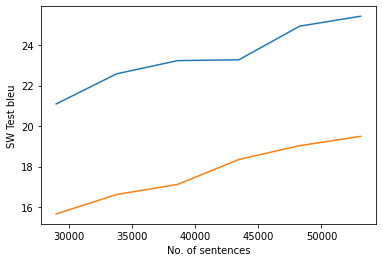

In [ ]:
#@title
df = pd.DataFrame(list(zip(sent,bleu,ambleu)), columns =['No. of sentences', 'SW Test bleu', 'AM Test bleu'])
df['query'] = 'random'

sns.lineplot(data=df, x="No. of sentences", y="SW Test bleu")
sns.lineplot(data=df, x="No. of sentences", y="AM Test bleu")

In [ ]:
df

,No. of sentences,SW Test bleu,AM Test bleu,query
0,28984,21.09,15.66,random
1,33783,22.58,16.62,random
2,38617,23.23,17.12,random
3,43457,23.27,18.35,random
4,48268,24.93,19.03,random
5,53093,25.42,19.49,random


Comparison between RTTL and Random for Swahili(Using data from the same fairly unclean distribution)

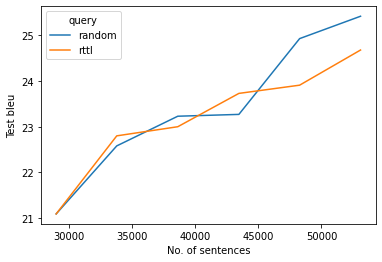

In [ ]:
#@title
df1 = pd.DataFrame(list(zip(sent,random_bleu)), columns =['No. of sentences', 'Test bleu'])
df1['query'] = 'random'

df2 = pd.DataFrame(list(zip(sent,rttl_bleu)), columns =['No. of sentences', 'Test bleu'])
df2['query'] = 'rttl'

df3 = pd.concat([df1,df2], ignore_index = True)

sns.lineplot(data=df3, x="No. of sentences", y="Test bleu", hue = "query")

# Iteration 2

Comparison between RTTL and Random for Swahili(Using data from the same fairly clean distribution)

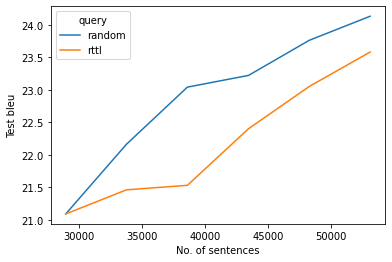

In [ ]:
#@title
df1 = pd.DataFrame(list(zip(sent,random_bleu)), columns =['No. of sentences', 'Test bleu'])
df1['query'] = 'random'

df2 = pd.DataFrame(list(zip(sent,rttl_bleu)), columns =['No. of sentences', 'Test bleu'])
df2['query'] = 'rttl'

df3 = pd.concat([df1,df2], ignore_index = True)

sns.lineplot(data=df3, x="No. of sentences", y="Test bleu", hue = "query")

# Iteration 3

Using fairly clean data with stratified RTTL

In [ ]:
def get_testresults(tgt, comp, reload, test):
  fname = 'train.log'
  fname2 = 'test.log'
  comp = comp
  reload = reload
  test = test

  bleu = [18.63]

  for i in range(2,7):
    if i in test:
      if i in comp:
        fff   = open(os.path.join('joeynmt/models/transformer_reverse_en'+tgt+str(i)+'_comet', fname2), 'r')   
        X = fff.readlines()    # Reading to a list 
        fff.close() 
      else:
        fff   = open(os.path.join('joeynmt/models/transformer_reverse_en'+tgt+str(i)+'_comet_reload', fname2), 'r')   
        X = fff.readlines()    # Reading to a list 
        fff.close() 
    else:
      if i in comp:
        fff   = open(os.path.join('joeynmt/models/transformer_reverse_en'+tgt+str(i)+'_comet', fname), 'r')   
        X = fff.readlines()    # Reading to a list 
        fff.close() 
      else:
        fff   = open(os.path.join('joeynmt/models/transformer_reverse_en'+tgt+str(i)+'_comet_reload', fname), 'r')   
        X = fff.readlines()    # Reading to a list 
        fff.close() 

    
    #print(list(filter(lambda x: re.search(r'test bleu',x), X[-5:]))[0][-64:-59])
    bleu.append(float(list(filter(lambda x: re.search(r'test bleu',x), X[-5:]))[0][-64:-59]))

  return bleu

In [ ]:
sw_randombleu = [18.63, 20.22, 20.14, 19.8, 20.91, 20.77] #get_testresults('sw',comp = [1,2,3,4], reload=[5,6],test=[])
sw_randombleu

[18.63, 20.22, 20.14, 19.8, 20.91, 20.77]

In [ ]:
sw_rttlbleu = [18.63, 20.06, 20.3, 20.93, 21.34, 21.74] # get_testresults('sw',comp = [2,3], reload=[4,5,6],test=[3])
sw_rttlbleu

[18.63, 20.06, 20.3, 20.93, 21.34, 21.74]

In [ ]:
sw_cometbleu = get_testresults('sw',comp = [3,5], reload=[2,4,6],test=[3,5])
sw_cometbleu 

[18.63, 20.89, 21.48, 21.97, 22.37, 22.37]

In [ ]:
[18.63, 20.89, 21.48, 21.97, 22.37]

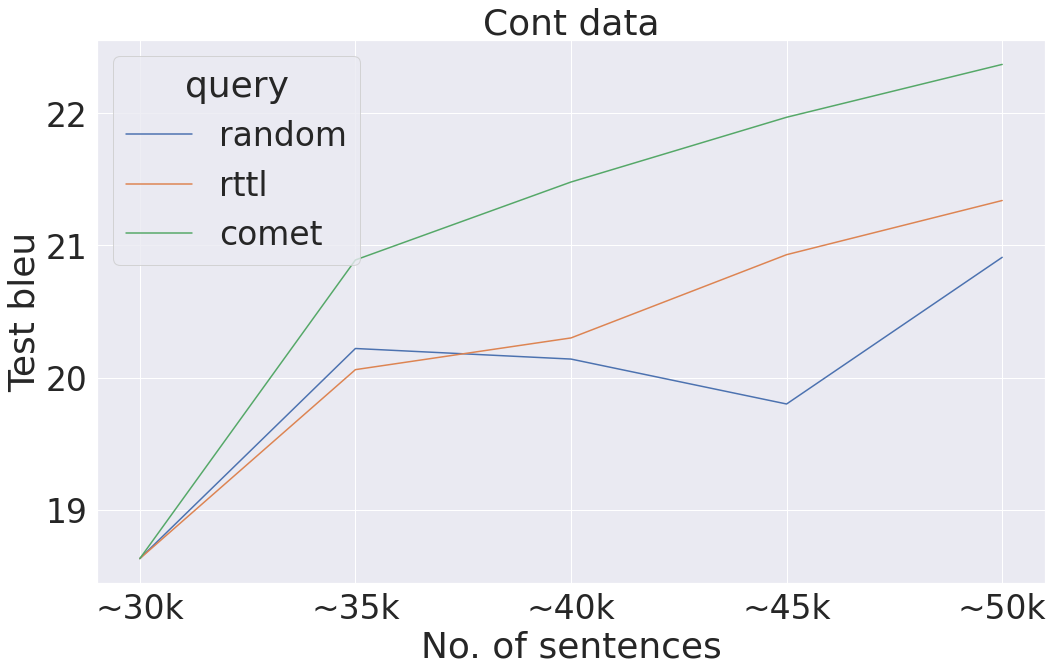

In [ ]:
#Swahili
sent = ['~30k', '~35k', '~40k', '~45k', '~50k']#, '~55k']
df1 = pd.DataFrame(list(zip(sent,sw_randombleu)), columns =['No. of sentences', 'Test bleu'])
df1['query'] = 'random'

df2 = pd.DataFrame(list(zip(sent,sw_rttlbleu)), columns =['No. of sentences', 'Test bleu'])
df2['query'] = 'rttl'

df3 = pd.DataFrame(list(zip(sent,sw_cometbleu)), columns =['No. of sentences', 'Test bleu'])
df3['query'] = 'comet'

df4 = pd.concat([df1,df2,df3], ignore_index = True)

plt.figure(figsize=(17,10))
sns.lineplot(data=df4, x="No. of sentences", y="Test bleu", hue = "query").set(title='Cont data')
plt.show()

# K1

In [ ]:
#Initial
inrand = [21.09,22.58,23.23,23.27,24.93,25.42]
innrttl = [21.09,22.80,23.00,23.73,23.91,24.68]

In [ ]:
#Round2


In [ ]:
def get_testresults(tgt, comp, reload, test, k):
  fname = 'train.log'
  fname2 = 'test.log'
  comp = comp
  reload = reload
  test = test

  bleu = []

  for i in range(2,7):
    if i in test:
      if i in comp:
        fff   = open(os.path.join('joeynmt/models/'+k+'/transformer_reverse_en'+tgt+str(i), fname2), 'r')   
        X = fff.readlines()    # Reading to a list 
        fff.close() 
      else:
        fff   = open(os.path.join('joeynmt/models/'+k+'/transformer_reverse_en'+tgt+str(i)+'_reload', fname2), 'r')   
        X = fff.readlines()    # Reading to a list 
        fff.close() 
    else:
      if i in comp:
        fff   = open(os.path.join('joeynmt/models/'+k+'/transformer_reverse_en'+tgt+str(i), fname), 'r')   
        X = fff.readlines()    # Reading to a list 
        fff.close() 
      else:
        fff   = open(os.path.join('joeynmt/models/'+k+'/transformer_reverse_en'+tgt+str(i)+'_reload', fname), 'r')   
        X = fff.readlines()    # Reading to a list 
        fff.close() 

    
    #print(list(filter(lambda x: re.search(r'test bleu',x), X[-5:]))[0][-64:-59])
    bleu.append(float(list(filter(lambda x: re.search(r'test bleu',x), X[-5:]))[0][-64:-59]))

  return bleu

In [ ]:
cometk3 = [25.31, 27.11, 28.31, 28.64, 28.93]
cometk4 = [25.05, 26.36, 28.02, 28.46, 28.89]
cometk5 = [24.39, 25.66, 28.2, 26.9, 28.9]

srttlk3 = [21.85, 23.06, 24.02, 24.58, 25.19]
srttlk4 = [22.08, 23.04, 23.13, 25.03, 25.74]
srttlk5 = [21.93, 22.2, 24.05, 25.07, 26.28]

nrttlk3 = [20.62, 20.64, 22.87, 23.84, 24.26]
nrttlk4 = [21.15, 20.82, 22.18, 24.36, 24.54]
nrttlk5 = [21.4, 21.67, 22.82, 23.79, 25.25]

randomk3 = [21.83, 24.23, 24.69, 26.9, 27.01]
randomk4 = [21.87, 23.92, 24.78, 26.55, 27.4]
randomk5 = [22.75, 24.38, 25.23, 26.63, 27.31]

In [ ]:
get_testresults('sw',comp = [2,3,5,6], reload=[4],test=[],k='k3')

[21.83, 24.23, 24.69, 26.9, 27.01]

In [ ]:
sw_randombleu = [21.52, 23.02, 24.72, 26.09, 25.89, 27.74]#get_testresults('sw',comp = [1,2,3,4,5], reload=[6],test=[],k='k1')
sw_randombleu

[21.52, 23.02, 24.72, 26.09, 25.89, 27.74]

In [ ]:
sw_randombleu2 = [21.37, 22.86, 24.83, 25.97, 26.79, 28.16]#get_testresults('sw',comp = [1,2,3,5,6], reload=[4],test=[],k='k2')
sw_randombleu2

[21.37, 22.86, 24.83, 25.97, 26.79, 28.16]

In [ ]:
for i in zip(sw_randombleu,sw_randombleu2):
  i = np.array(i)
  print("Mean:", np.mean(i))
  print("Std:", np.std(i))

Mean: 21.445
Std: 0.07499999999999929
Mean: 22.939999999999998
Std: 0.08000000000000007
Mean: 24.775
Std: 0.054999999999999716
Mean: 26.03
Std: 0.0600000000000005
Mean: 26.34
Std: 0.4499999999999993
Mean: 27.95
Std: 0.21000000000000085


In [ ]:
sw_rttlbleu = [21.52, 21.79, 22.21, 24.53, 24.53, 25.82]#get_testresults('sw',comp = [2,4], reload=[3,5,6],test=[],k='k1')
sw_rttlbleu

[21.52, 21.79, 22.21, 24.53, 24.53, 25.82]

In [ ]:
sw_rttlbleu2 = [21.37, 20.81, 23.51, 24.29, 24.88, 26.42]#get_testresults('sw',comp = [2,4,6], reload=[3,5],test=[],k='k2')
sw_rttlbleu2

[21.37, 20.81, 23.51, 24.29, 24.88, 26.42]

In [ ]:
for i in zip(sw_rttlbleu,sw_rttlbleu2):
  i = np.array(i)
  print("Mean:", np.mean(i))
  print("Std:", np.std(i))

Mean: 21.445
Std: 0.07499999999999929
Mean: 21.299999999999997
Std: 0.4900000000000002
Mean: 22.86
Std: 0.6500000000000004
Mean: 24.41
Std: 0.120000000000001
Mean: 24.705
Std: 0.17499999999999893
Mean: 26.12
Std: 0.3000000000000007


In [ ]:
sw_cometbleu = [21.52, 25.47, 27.47, 27.85, 28.75, 29.61]#get_testresults('sw',comp = [2,3,5], reload=[4,6],test=[],k = 'k1')
sw_cometbleu 

[21.52, 25.47, 27.47, 27.85, 28.75, 29.61]

In [ ]:
sw_cometbleu2 = [21.37, 25.83, 27.73, 28.24, 29.14, 29.9]#get_testresults('sw',comp = [2,3], reload=[4,5,6],test=[],k = 'k2')
sw_cometbleu2 

[21.37, 25.83, 27.73, 28.24, 29.14, 29.9]

In [ ]:
for i in zip(sw_cometbleu,sw_cometbleu2):
  i = np.array(i)
  print("Mean:", np.mean(i))
  print("Std:", np.std(i))

Mean: 21.445
Std: 0.07499999999999929
Mean: 25.65
Std: 0.17999999999999972
Mean: 27.6
Std: 0.13000000000000078
Mean: 28.045
Std: 0.1949999999999985
Mean: 28.945
Std: 0.19500000000000028
Mean: 29.755
Std: 0.14499999999999957


In [ ]:
sw_nrttlbleu = [21.52, 21.32, 22.67, 21.93, 24.14, 25.3]#get_testresults('sw',comp = [2,4,5], reload=[3,6],test=[5],k='k1')
sw_nrttlbleu

[21.52, 21.32, 22.67, 21.93, 24.14, 25.3]

In [ ]:
sw_nrttlbleu2 = [21.37, 20.35, 22.67, 23.55, 24.08, 25.47]#get_testresults('sw',comp = [2,3,5], reload=[4,6],test=[5],k='k2')
sw_nrttlbleu2

[21.37, 20.35, 22.67, 23.55, 24.08, 25.47]

In [ ]:
for i in zip(sw_nrttlbleu,sw_nrttlbleu2):
  i = np.array(i)
  print("Mean:", np.mean(i))
  print("Std:", np.std(i))

Mean: 21.445
Std: 0.07499999999999929
Mean: 20.835
Std: 0.48499999999999943
Mean: 22.67
Std: 0.0
Mean: 22.740000000000002
Std: 0.8100000000000005
Mean: 24.11
Std: 0.030000000000001137
Mean: 25.384999999999998
Std: 0.08499999999999908


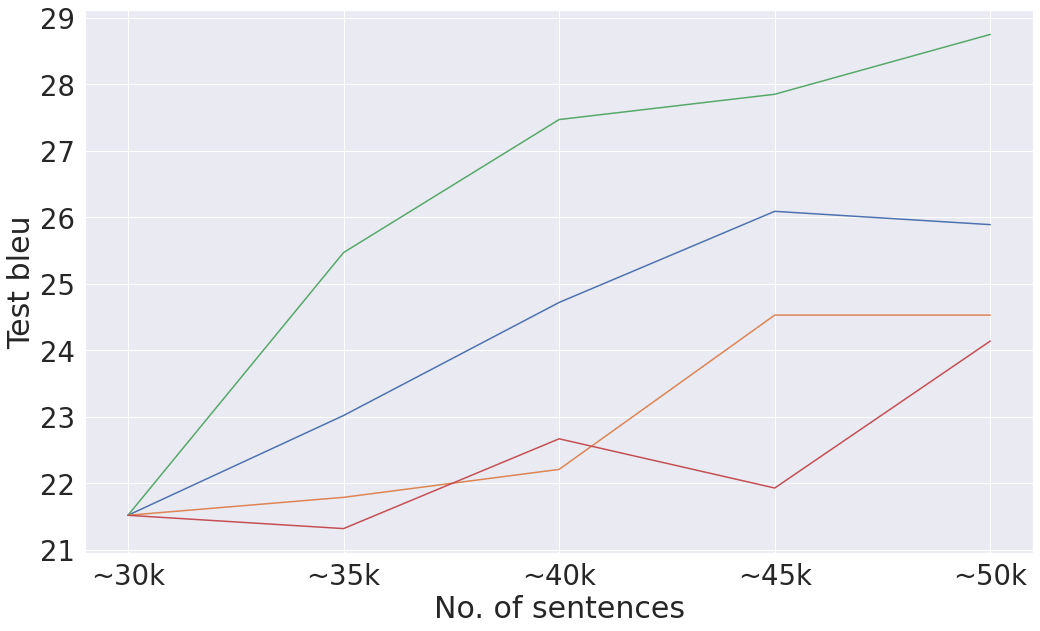

In [ ]:
#Swahili
sent = ['~30k', '~35k', '~40k', '~45k', '~50k']#, '~55k']
df1 = pd.DataFrame(list(zip(sent,sw_randombleu)), columns =['No. of sentences', 'Test bleu'])
df1['query'] = 'random'

df2 = pd.DataFrame(list(zip(sent,sw_rttlbleu)), columns =['No. of sentences', 'Test bleu'])
df2['query'] = 'rttl'

df3 = pd.DataFrame(list(zip(sent,sw_cometbleu)), columns =['No. of sentences', 'Test bleu'])
df3['query'] = 'comet'

df5 = pd.DataFrame(list(zip(sent,sw_nrttlbleu)), columns =['No. of sentences', 'Test bleu'])
df5['query'] = 'nrttl'

dfr4 = pd.concat([df1,df2,df3,df5], ignore_index = True)

dff1 = pd.DataFrame(list(zip(sent,sw_randombleu2)), columns =['No. of sentences', 'Test bleu'])
dff1['query'] = 'random'

dff2 = pd.DataFrame(list(zip(sent,sw_rttlbleu2)), columns =['No. of sentences', 'Test bleu'])
dff2['query'] = 'rttl'

dff3 = pd.DataFrame(list(zip(sent,sw_cometbleu2)), columns =['No. of sentences', 'Test bleu'])
dff3['query'] = 'comet'

dff5 = pd.DataFrame(list(zip(sent,sw_nrttlbleu2)), columns =['No. of sentences', 'Test bleu'])
dff5['query'] = 'nrttl'

dff4 = pd.concat([dff1,dff2,dff3,dff5], ignore_index = True)

sns.set(font_scale = 2.5)
#fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(17,10))
plt.figure(figsize=(17,10))
#sns.lineplot(data=df4, x="No. of sentences", y="Test bleu", hue = "query", legend = False).set(title='All runs')
sns.lineplot(data=dfr4, x="No. of sentences", y="Test bleu", hue = "query", legend = False)
#sns.lineplot(data=dff4, x="No. of sentences", y="Test bleu", hue = "query")
#     markers=True, lw=3)#.set(title='Swahili BLEU of RTTL, COMET and Random AL')
# p = sns.lineplot(data=dff4, x="No. of sentences", y="Test bleu", hue = "query", style="query",
#     markers=True, lw=3)#.set(title='Swahili BLEU of RTTL, COMET and Random AL')
# p.set_xlabel("No. of Sentences")
# p.set_ylabel("Test BLEU Score")
# #p.set_title("Plot", fontsize = 20)
# plt.legend(labels=["Random","Stratified RTTL", "COMET-QE","Naive RTTL"], fontsize = 25)
# plt.savefig('result.png')

In [ ]:
?plt.subplots

## Looking at the data

In [ ]:
def df_stats(files_to_compare):

  dfs = []

  #pd.set_option('display.max_colwidth', None)
  
  sympa = '[_\W]' #'[-,*`.;''""@_!#$%^&*()<>?/\|}{~:]{5}'
  numpa = '\d'

  for i in files_to_compare:
    df = pd.read_csv(i)
    # print('Number of sentences: ', df.shape[0])

    # Sentence stats
    df['src_len'] = df.apply(lambda row: len(row.source_sentence.split()), axis = 1)
    df['tgt_len'] = df.apply(lambda row: len(row.target_sentence.split()), axis = 1)

    df['schar_len'] = df.apply(lambda row: len(row.source_sentence), axis = 1)
    df['tchar_len'] = df.apply(lambda row: len(row.target_sentence), axis = 1)


    # print('Source: \n min_len={}, max_len={}, avg_len={:.1f}'.format(df['src_len'].min(),
    #                                                       df['src_len'].max(),
    #                                                       df['src_len'].mean()))
    # print('Target: \n min_len={}, max_len={}, avg_len={:.1f}'.format(df['tgt_len'].min(),
    #                                                       df['tgt_len'].max(),
    #                                                       df['tgt_len'].mean()))
    # display(df.sample(n=3))

    df['snum_len'] = df.apply(lambda row: len(re.findall(numpa, row.source_sentence)), axis = 1)
    df['tnum_len'] = df.apply(lambda row: len(re.findall(numpa, row.target_sentence)), axis = 1)

    df['ssym_len'] = df.apply(lambda row: len(re.findall(sympa, row.source_sentence)), axis = 1)
    df['tsym_len'] = df.apply(lambda row: len(re.findall(sympa, row.target_sentence)), axis = 1)

    # print('Target: \n avg_sym={:.1f}, avg_num={:.1f}'.format(df['tsym_len'].mean(),
    #                                                       df['tnum_len'].mean()))
    df["new_tgt"] = df['target_sentence'].str.lower().str.replace('[^\w\s]','')
  
    new_df = df.new_tgt.str.split(expand=True).stack().value_counts().reset_index()
    
    new_df.columns = ['w', 'f']

    x = new_df['f'].values #returns a numpy array
    x = np.reshape(x, (new_df.shape[0], 1))
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    new_df['weight'] = x_scaled

    # display(new_df.head(5))
    # df['wf'] = df.apply(lambda row: np.mean([new_df.loc[new_df['w'] == i,'weight'].item() for i in row.new_tgt.split()]), axis = 1)
    
    # display(new_df.shape)
    # display(df.mean(axis = 0))
    dfs.append(new_df.shape[0])
    # dfs.append(df)

  # Sentence length distribution
  # fig, ax = plt.subplots(2, 2,figsize=(30,15))
  # for file, df in zip(files_to_compare,dfs):
  #   ax[0,0].hist(df['src_len'], bins=range(0,130,10), alpha=0.4, label=file)
  #   ax[0,1].hist(df['tgt_len'], bins=range(0,130,10), alpha=0.4, label=file)
  #   # ax[1,0].hist(df['snum_len'], bins=range(0,130,10), alpha=0.4, label=file)
  #   # ax[1,1].hist(df['tnum_len'], bins=range(0,130,10), alpha=0.4, label=file)
  #   ax[1,0].hist(df['ssym_len'], bins=range(0,130,10), alpha=0.4, label=file)
  #   ax[1,1].hist(df['tsym_len'], bins=range(0,130,10), alpha=0.4, label=file)

  # # ax = df.hist(figsize=(20,15), color='#86bf91',bins=range(0,130,10))
  # # for x in ax.flatten():
  # #   x.set_xticks(range(0,130,10))
  # plt.legend(loc='upper right')
  # plt.show()
  return dfs

### Comparisons

Number of sentences:  30000
Target: 
 min_len=1, max_len=63, avg_len=18.2
Number of sentences:  21473
Target: 
 min_len=1, max_len=107, avg_len=19.7
Number of sentences:  69119
Target: 
 min_len=2, max_len=140, avg_len=13.7


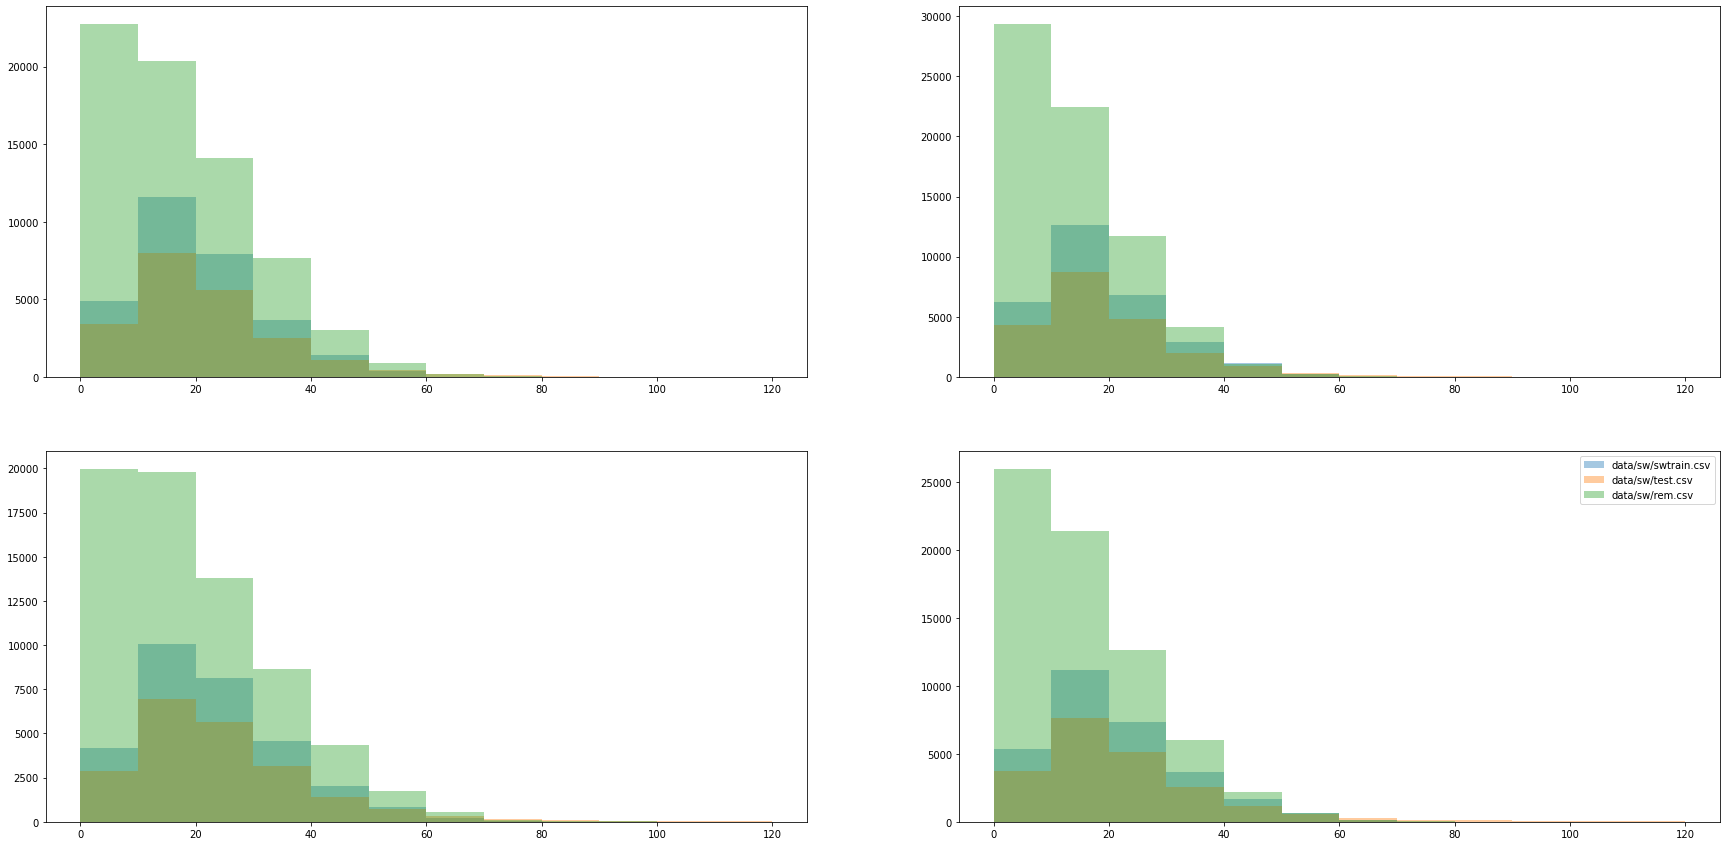

In [ ]:
df_stats(['data/sw/swtrain.csv','data/sw/test.csv','data/sw/rem.csv'])

Number of sentences:  5000
Target: 
 min_len=1, max_len=83, avg_len=10.8
Number of sentences:  4999
Target: 
 min_len=2, max_len=69, avg_len=16.6


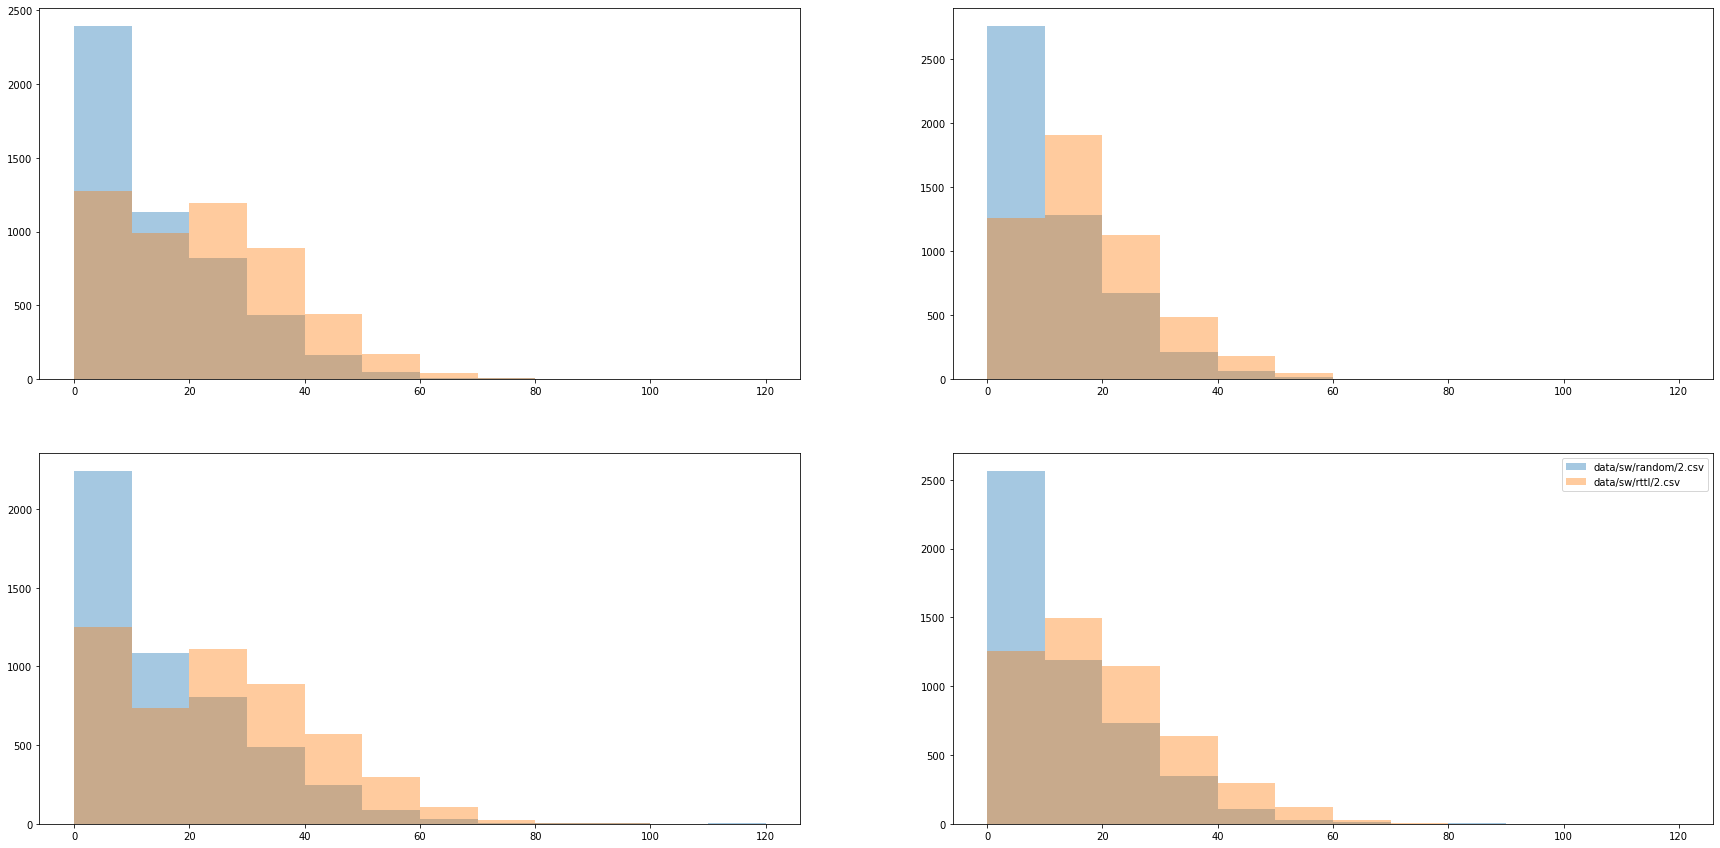

In [ ]:
df_stats(['data/sw/random/2.csv','data/sw/rttl/2.csv'])

Number of sentences:  4999
Target: 
 min_len=2, max_len=69, avg_len=16.6
Number of sentences:  5000
Target: 
 min_len=2, max_len=140, avg_len=31.8


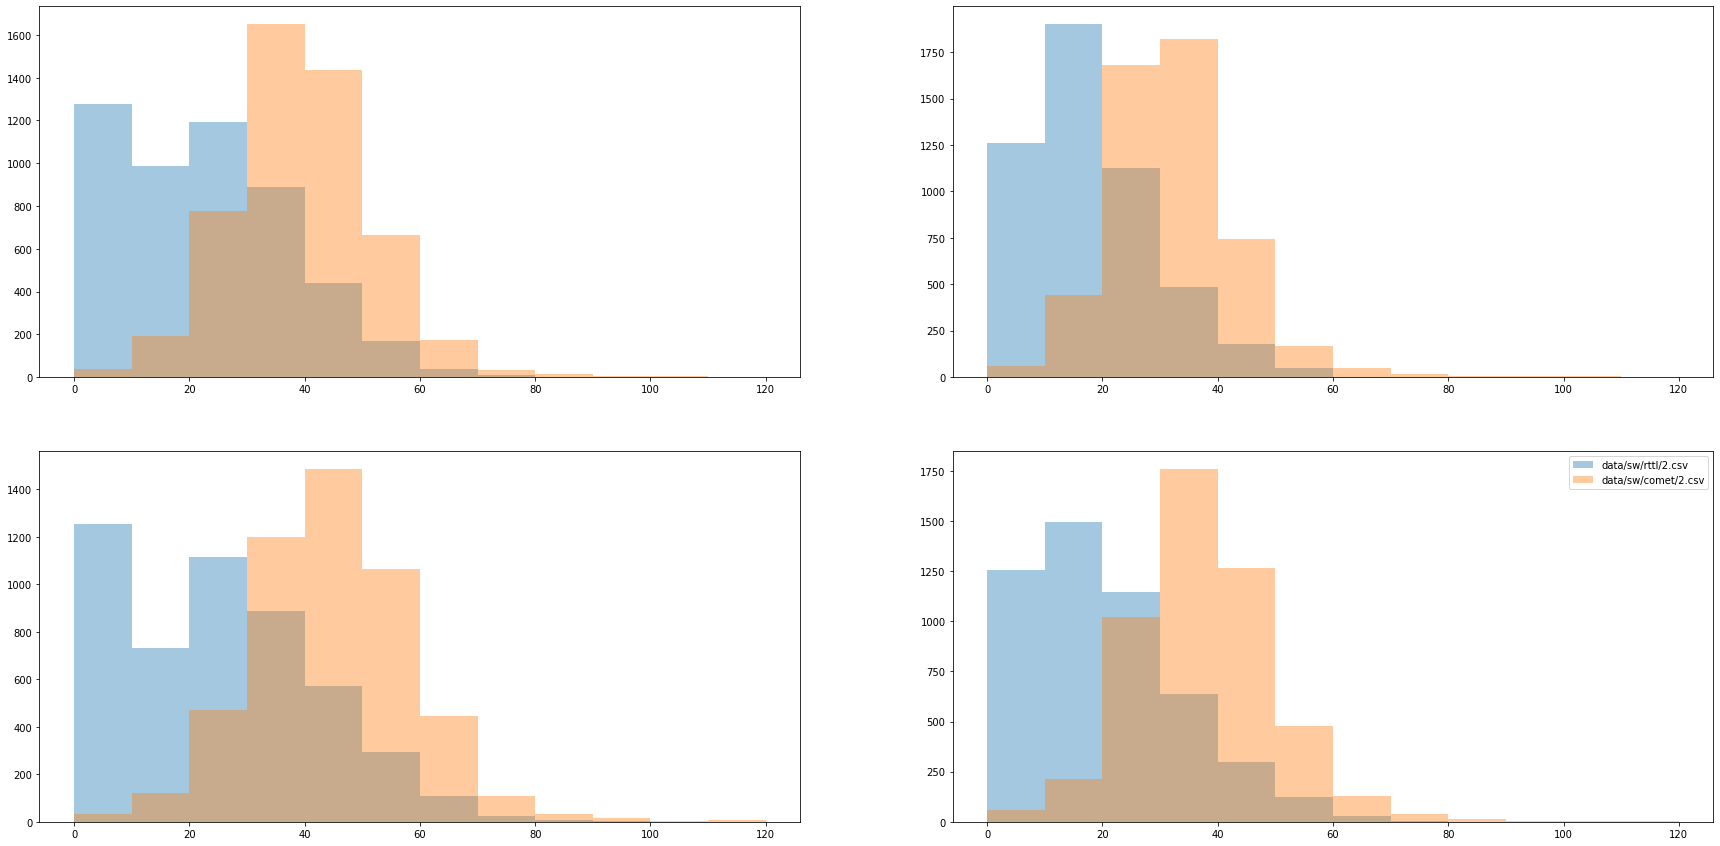

In [ ]:
df_stats(['data/sw/rttl/2.csv','data/sw/comet/2.csv'])

Number of sentences:  5000
Target: 
 min_len=1, max_len=72, avg_len=10.8
Number of sentences:  4999
Target: 
 min_len=2, max_len=69, avg_len=17.4


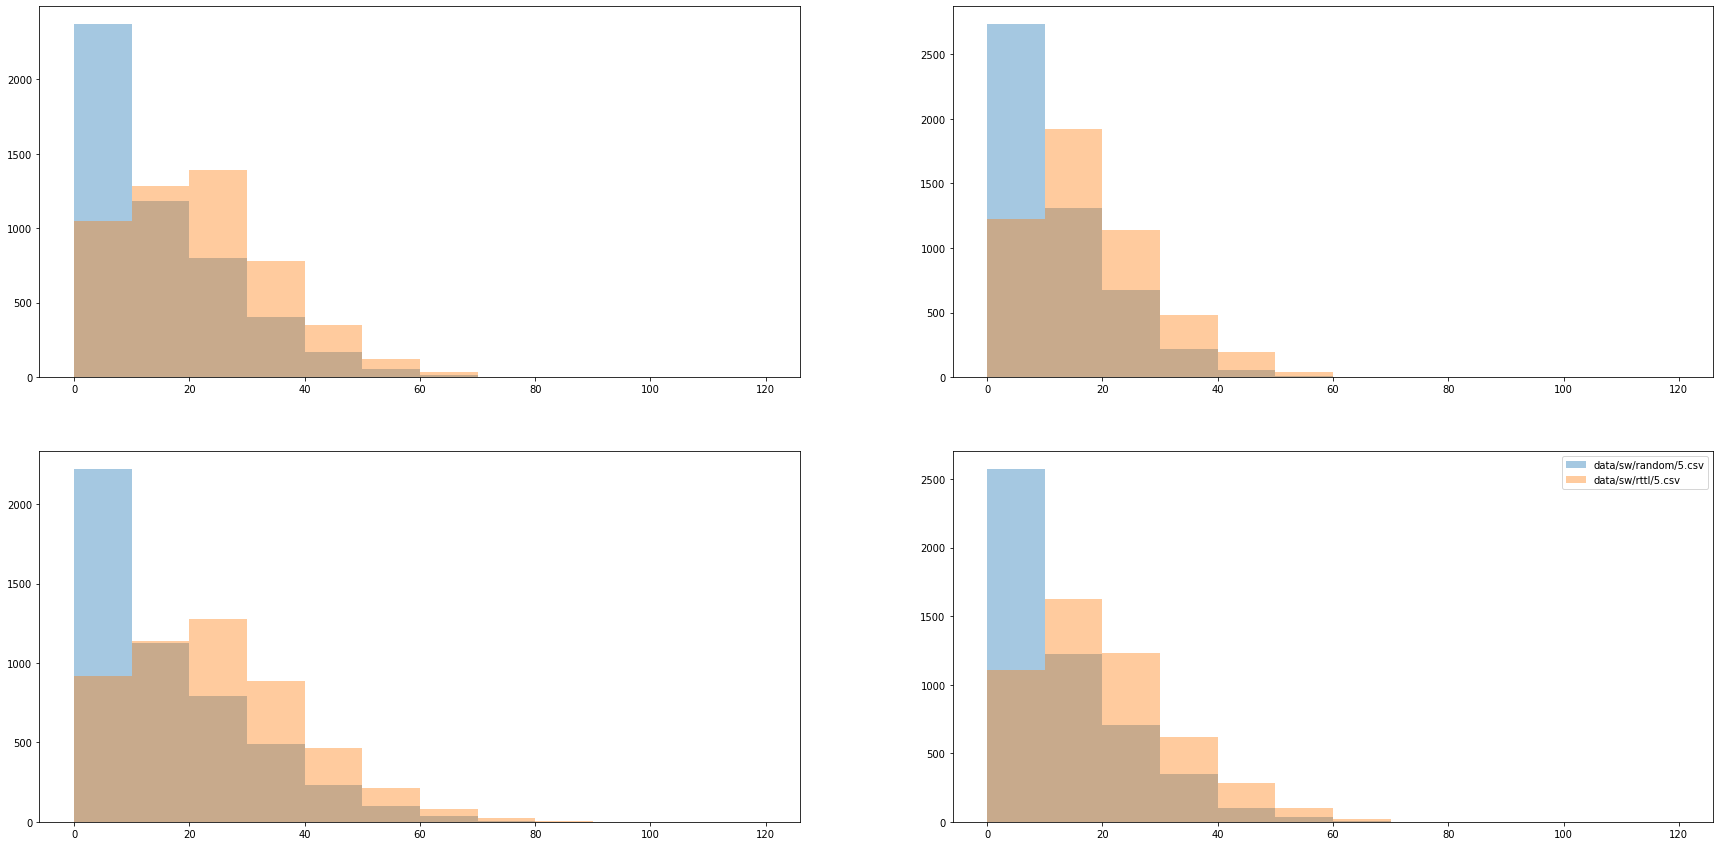

In [ ]:
df_stats(['data/sw/random/5.csv','data/sw/rttl/5.csv'])

Number of sentences:  4999
Target: 
 min_len=2, max_len=69, avg_len=17.4
Number of sentences:  5000
Target: 
 min_len=2, max_len=50, avg_len=15.5


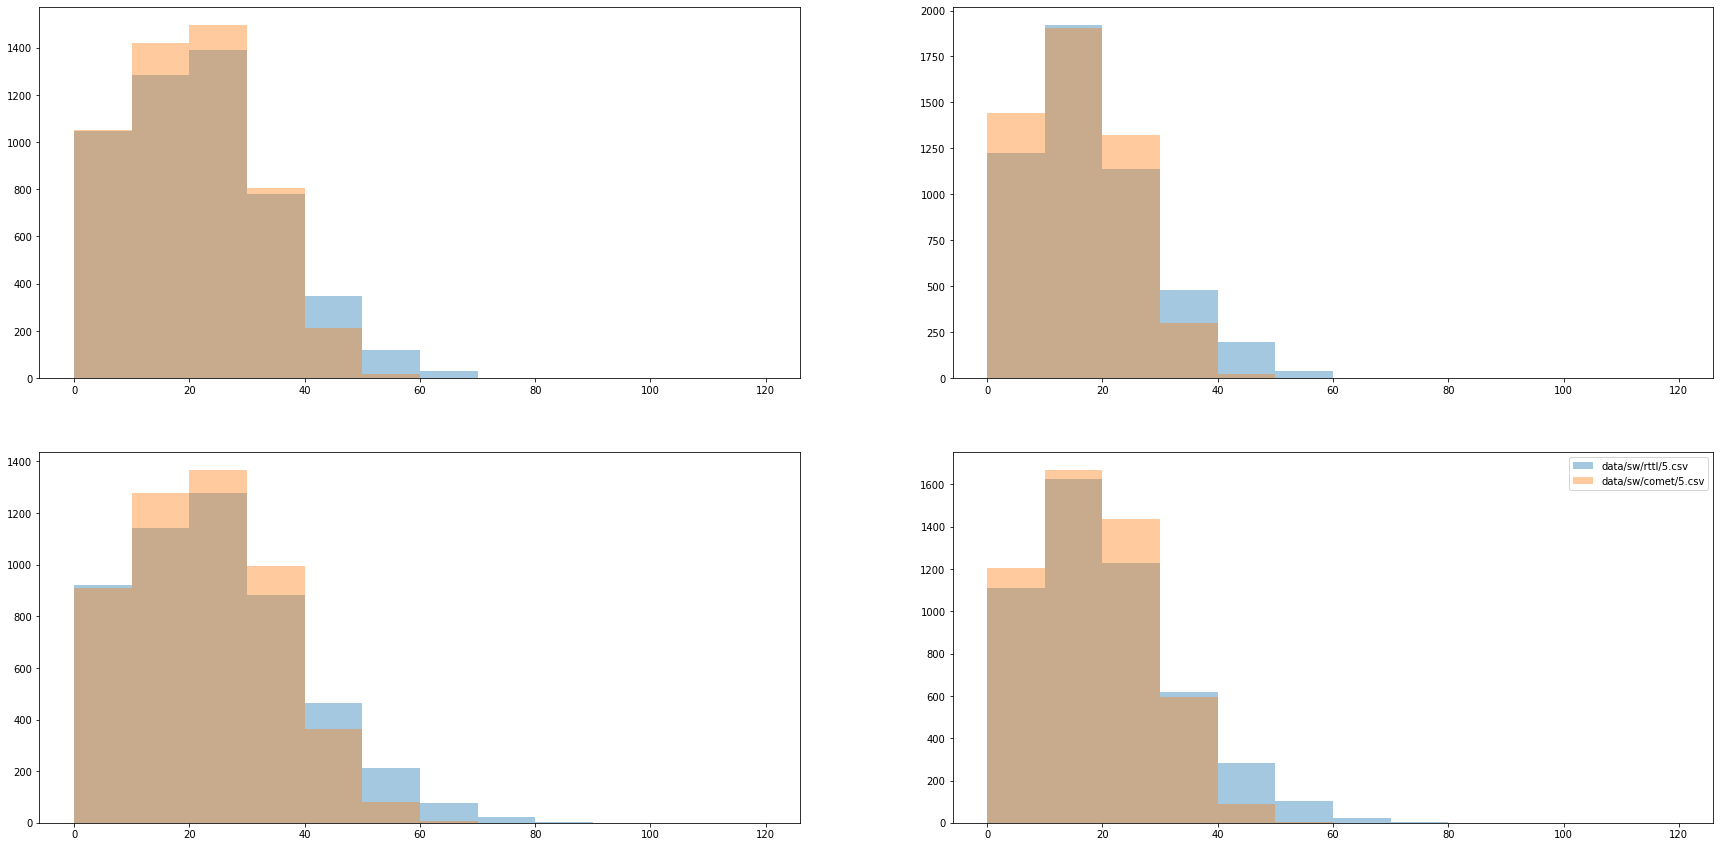

In [ ]:
df_stats(['data/sw/rttl/5.csv','data/sw/comet/5.csv'])

Number of sentences:  31000
Target: 
 min_len=1, max_len=110, avg_len=19.7
Number of sentences:  5000
Target: 
 min_len=1, max_len=110, avg_len=20.3


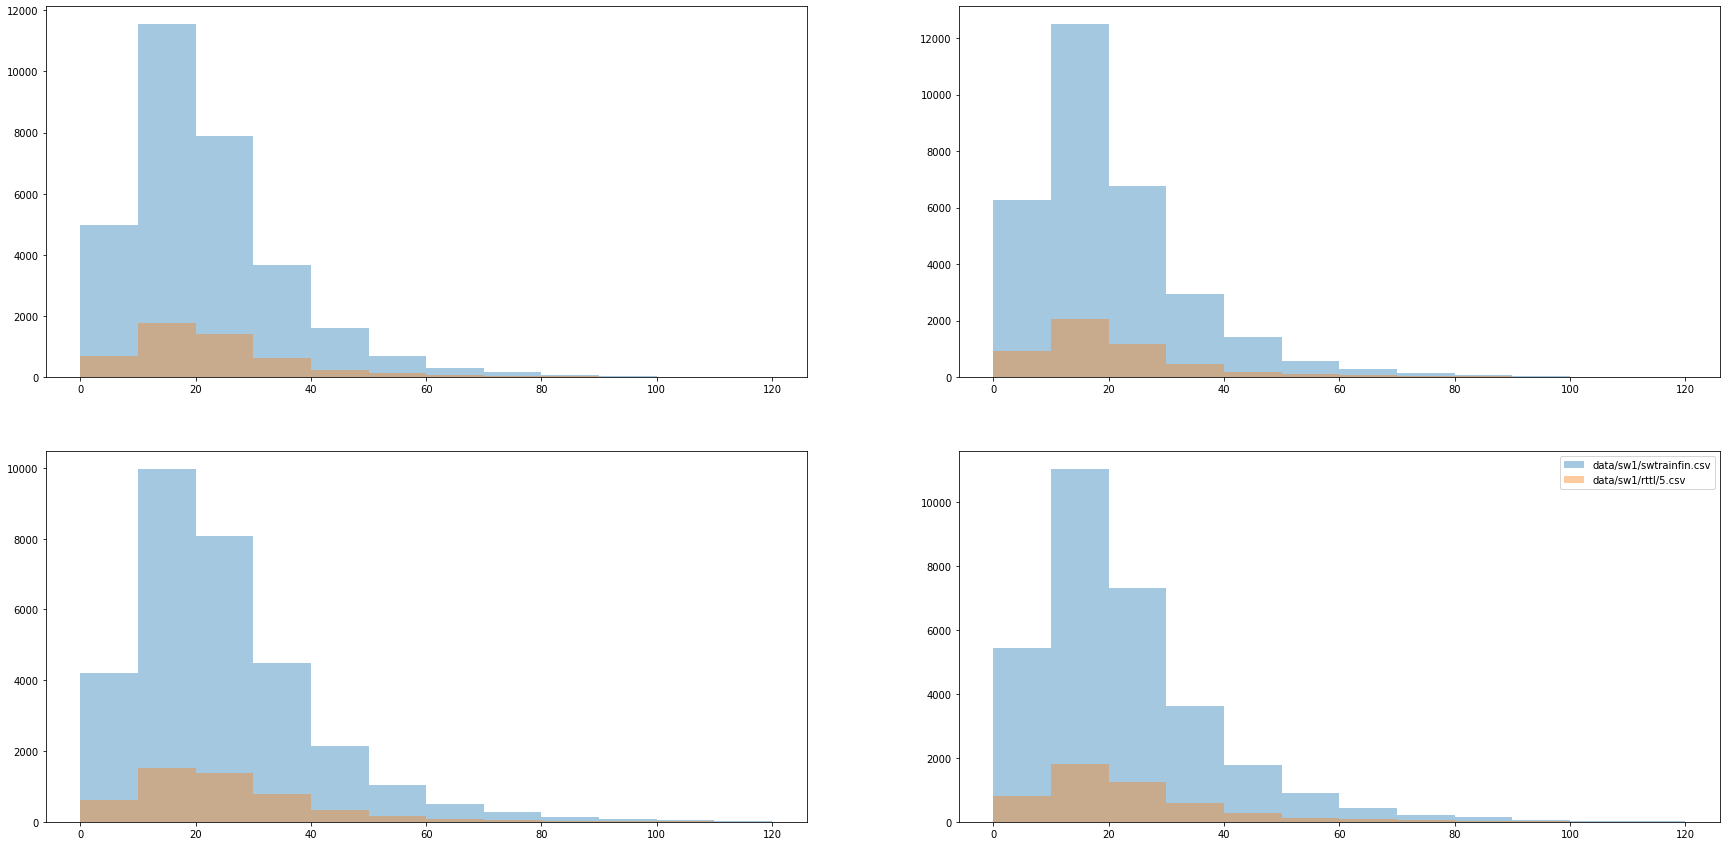

In [ ]:
df_stats(['data/sw1/swtrainfin.csv','data/sw1/rttl/5.csv'])

Number of sentences:  31000
Target: 
 min_len=1, max_len=110, avg_len=19.7
Number of sentences:  4999
Target: 
 min_len=2, max_len=70, avg_len=17.6


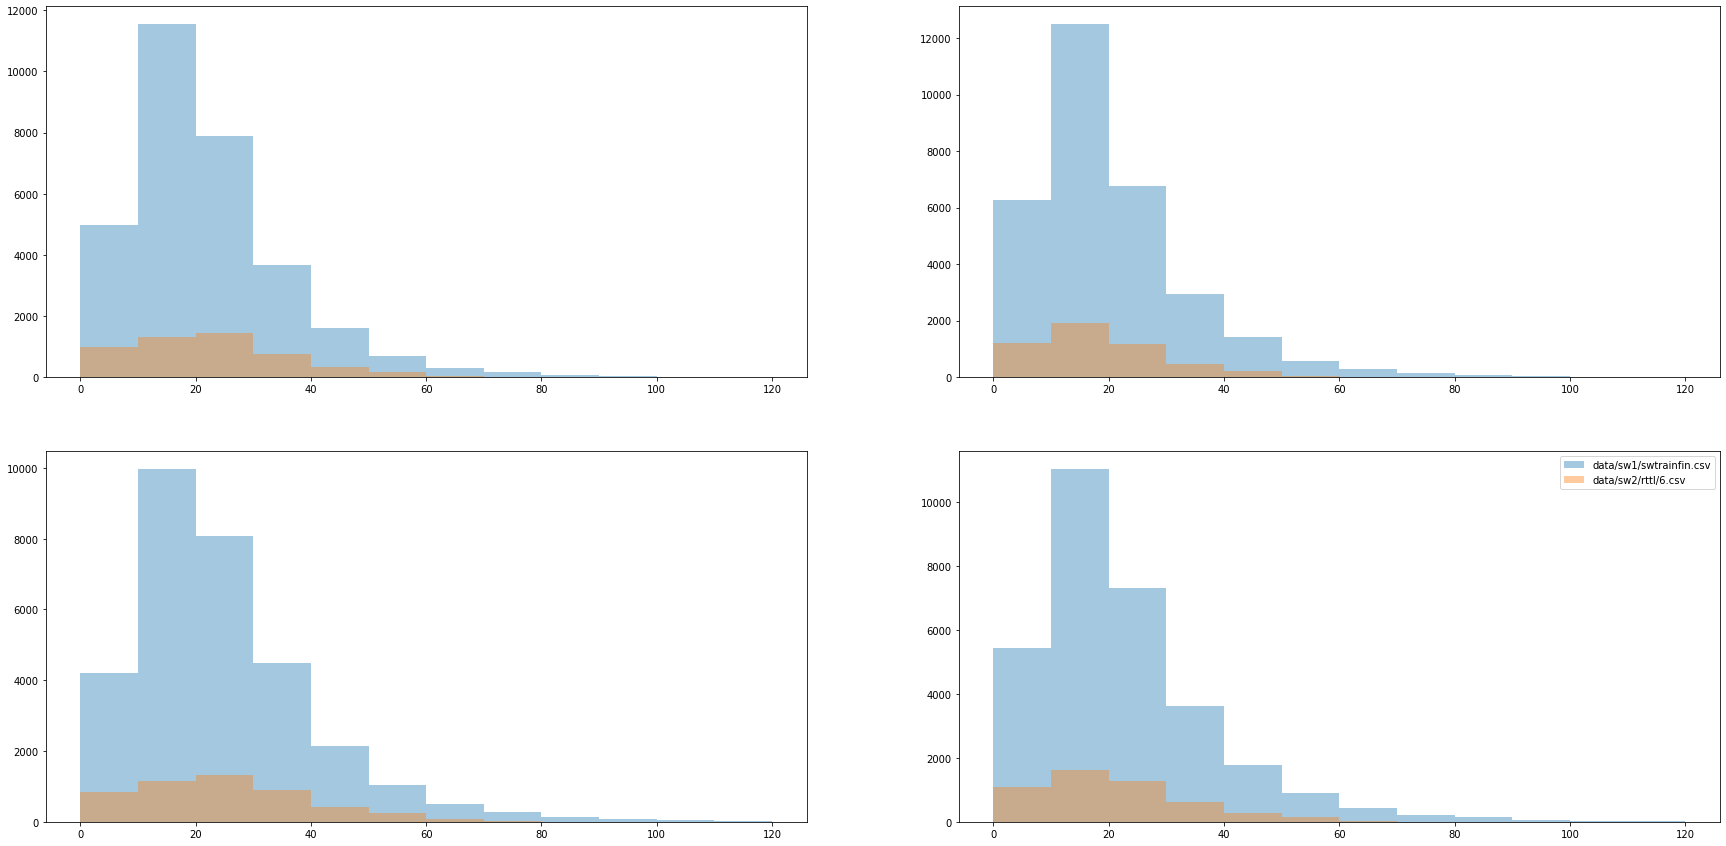

In [ ]:
df_stats(['data/sw1/swtrainfin.csv', 'data/sw2/rttl/6.csv'])

Number of sentences:  5000
Target: 
 min_len=1, max_len=83, avg_len=10.2
Number of sentences:  5000
Target: 
 min_len=1, max_len=83, avg_len=5.3
Number of sentences:  5000
Target: 
 min_len=1, max_len=99, avg_len=24.7


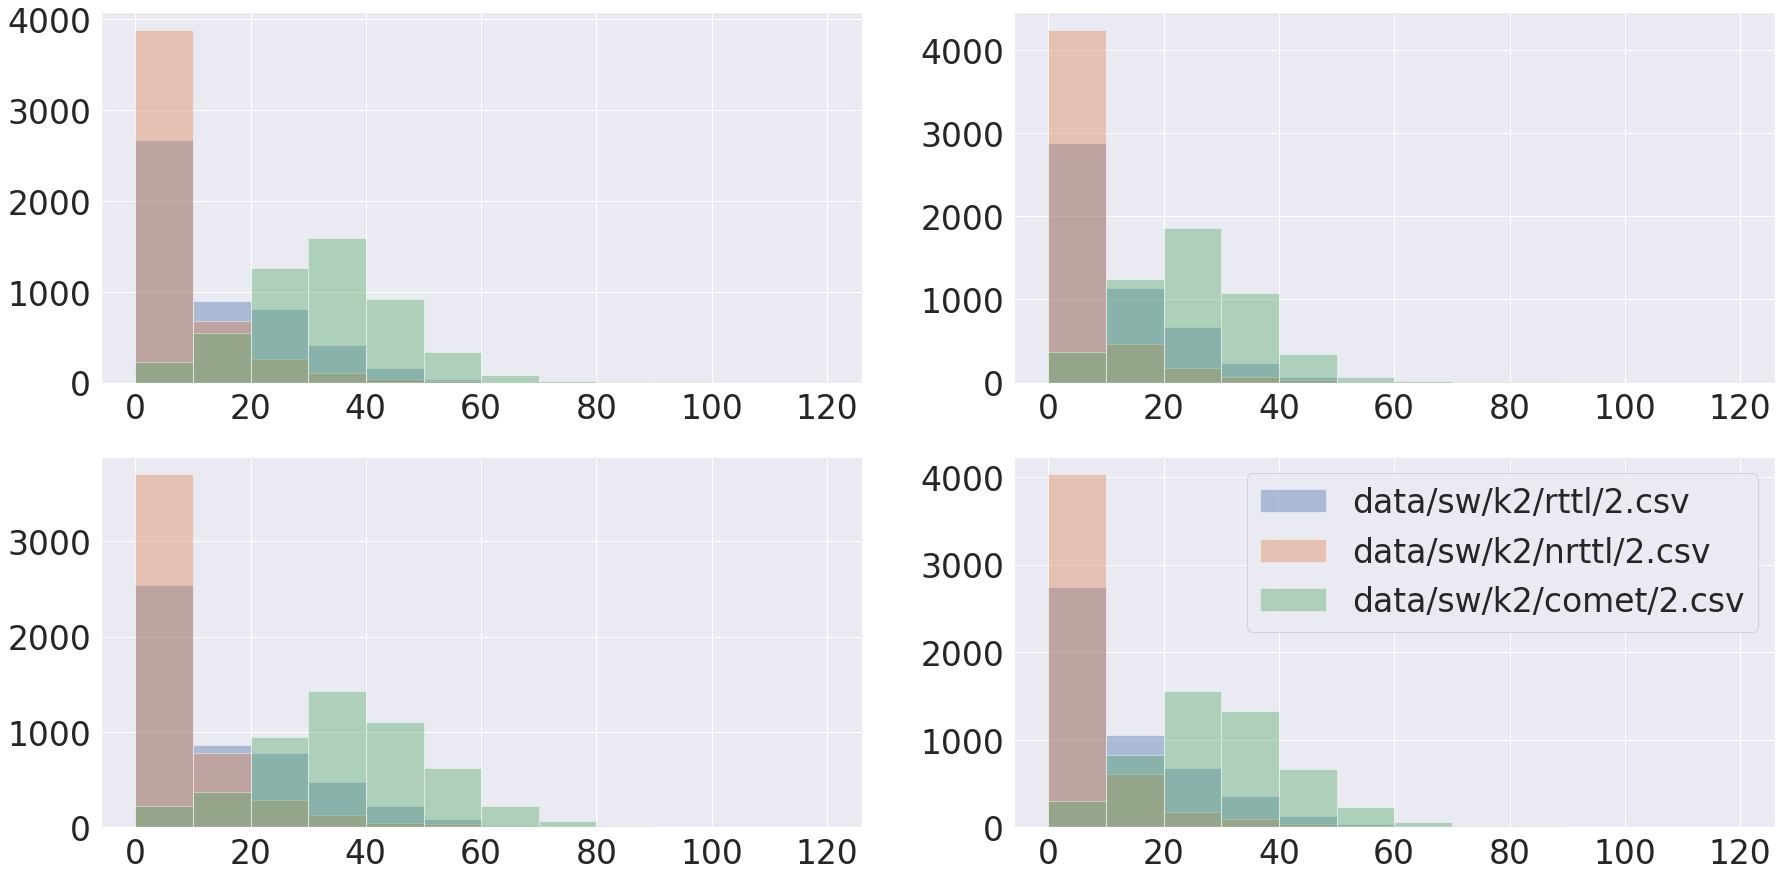

In [ ]:
df_stats(['data/sw/k2/rttl/2.csv', 'data/sw/k2/nrttl/2.csv','data/sw/k2/comet/2.csv'])

In [ ]:
for i in range(2,7):
  i = str(i)
  print('Iteration-----------------:',i)
  # df_stats(['data/sw/k2/rttl/'+i+'.csv', 'data/sw/k2/nrttl/'+i+'.csv','data/sw/k2/comet/'+i+'.csv'])
  df_stats(['data/sw/k2/rttl/'+i+'.csv'])

Iteration-----------------: 2
Number of sentences:  5000
Target: 
 min_len=1, max_len=83, avg_len=10.2
Target: 
 avg_sym=11.3, avg_num=0.2
Iteration-----------------: 3
Number of sentences:  4999
Target: 
 min_len=1, max_len=72, avg_len=10.4
Target: 
 avg_sym=11.5, avg_num=0.2
Iteration-----------------: 4
Number of sentences:  4999
Target: 
 min_len=1, max_len=74, avg_len=10.2
Target: 
 avg_sym=11.2, avg_num=0.2
Iteration-----------------: 5
Number of sentences:  4999
Target: 
 min_len=1, max_len=73, avg_len=10.5
Target: 
 avg_sym=11.7, avg_num=0.2
Iteration-----------------: 6
Number of sentences:  4999
Target: 
 min_len=1, max_len=79, avg_len=10.8
Target: 
 avg_sym=12.1, avg_num=0.2


In [ ]:
df_stats(['data/sw/k2/test.csv'])

Number of sentences:  17901
Target: 
 min_len=1, max_len=96, avg_len=10.8
Target: 
 avg_sym=12.1, avg_num=0.2


In [ ]:
df_stats(['data/sw/k1/test.csv'])

Number of sentences:  17901
Target: 
 min_len=1, max_len=79, avg_len=10.8
Target: 
 avg_sym=12.1, avg_num=0.2


In [ ]:
df_stats(['data/sw/k3/test.csv'])

Number of sentences:  17901
Target: 
 min_len=1, max_len=83, avg_len=10.9
Target: 
 avg_sym=12.3, avg_num=0.2


In [ ]:
df_stats(['data/sw/k4/test.csv'])

Number of sentences:  17901
Target: 
 min_len=1, max_len=99, avg_len=10.7
Target: 
 avg_sym=12.0, avg_num=0.2


In [ ]:
df_stats(['data/sw/k5/test.csv'])

Number of sentences:  17901
Target: 
 min_len=1, max_len=86, avg_len=10.9
Target: 
 avg_sym=12.2, avg_num=0.2


### Analysis

In [ ]:
#Train and test set
df_stats(['data/sw/k1/swtrain.csv','data/sw/k1/test.csv'])

Number of sentences:  30000


,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,Dear Sir,Bwana Mpendwa,2,2,8,13,0,0,1,1,bwana mpendwa,0.07027


src_len      13.899967
tgt_len      10.781300
schar_len    74.811733
tchar_len    69.666100
snum_len      0.190100
tnum_len      0.186167
ssym_len     15.314567
tsym_len     12.105800
wf            0.087976
dtype: float64

Number of sentences:  17901


,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,"Or if he ask a fish, will he give him a serpent?","Au akiomba samaki, atampa nyoka?",12,5,48,32,0,0,13,6,au akiomba samaki atampa nyoka,0.01037


src_len      13.999888
tgt_len      10.797609
schar_len    75.252500
tchar_len    69.749511
snum_len      0.183956
tnum_len      0.182169
ssym_len     15.451204
tsym_len     12.143623
wf            0.086321
dtype: float64

In [ ]:
df_stats(['data/sw/k1/random/2.csv','data/sw/k1/rttl/2.csv','data/sw/k1/nrttl/2.csv','data/sw/k1/comet/2.csv'])

Number of sentences:  5000


,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,And if the followers of the Book had believed and guarded We would certainly have covered their evil deeds and We would certainly have made them enter gardens of bliss,"Na lau kuwa Watu wa Kitabu wangeli amini na wakachamngu hapana shaka tungeli wafutia makosa yao, na tungeli waingiza katika Bustani zenye neema.",30,23,168,144,0,0,30,24,na lau kuwa watu wa kitabu wangeli amini na wakachamngu hapana shaka tungeli wafutia makosa yao na tungeli waingiza katika bustani zenye neema,0.174408


src_len      13.836200
tgt_len      10.656000
schar_len    74.346800
tchar_len    68.914200
snum_len      0.146400
tnum_len      0.140000
ssym_len     15.234800
tsym_len     11.955600
wf            0.086121
dtype: float64

Number of sentences:  5000


,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,General elections and by-elections,General elections and by-elections,4,4,34,34,0,0,4,4,general elections and byelections,0.000576


src_len      12.79600
tgt_len      10.17960
schar_len    71.15140
tchar_len    66.29220
snum_len      0.27580
tnum_len      0.25120
ssym_len     14.03080
tsym_len     11.27680
wf            0.06768
dtype: float64

Number of sentences:  5000


,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,General elections and by-elections,General elections and by-elections,4,4,34,34,0,0,4,4,general elections and byelections,0.000916


src_len       6.912800
tgt_len       5.233800
schar_len    39.221400
tchar_len    34.500800
snum_len      0.162200
tnum_len      0.145000
ssym_len      7.298000
tsym_len      5.449400
wf            0.044444
dtype: float64

Number of sentences:  5000


,source_sentence,target_sentence,scores,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,"1 Any member may by notice duly signed by him or her deliver to the Secretary not less than 7 and not more than 21 days before the day appointed for the Annual General Meeting give notice of his intention to propose any other person for election to the Board, such notice to be accompanied by a notice signed by the person proposed of his or her willingness to be elected.","1 Mwanachama yeyote anaweza kutoa ilani yenye sahihi yake kwa katibu katika Kipindi cha muda usiopungua siku saba na usiozidi siku 21 kabla ya siku iliyoteuliwa ya mkutano mkuu wa mwaka, ilani hii ya kupendekeza mshiriki yeyote katika uchaguzi wa halamashauri.",-0.016778,71,41,373,261,4,3,73,43,1 mwanachama yeyote anaweza kutoa ilani yenye sahihi yake kwa katibu katika kipindi cha muda usiopungua siku saba na usiozidi siku 21 kabla ya siku iliyoteuliwa ya mkutano mkuu wa mwaka ilani hii ya kupendekeza mshiriki yeyote katika uchaguzi wa halamashauri,0.125517


scores         0.027664
src_len       31.590800
tgt_len       24.471000
schar_len    169.030800
tchar_len    158.579400
snum_len       0.475400
tnum_len       0.453200
ssym_len      35.569600
tsym_len      28.573200
wf             0.121932
dtype: float64

In [ ]:
c=['Random', 'NRTTL', 'SRTTL','COMET']
df = pd.DataFrame(columns = c)
  
# append rows to an empty DataFrame
df = df.append({ k:v for (k,v) in zip(c, df_stats(['data/sw/k1/random/2.csv','data/sw/k1/nrttl/2.csv','data/sw/k1/rttl/2.csv','data/sw/k1/comet/2.csv']))} , 
                ignore_index = True)
df = df.append({ k:v for (k,v) in zip(c, df_stats(['data/sw/k1/random/3.csv','data/sw/k1/nrttl/3.csv','data/sw/k1/rttl/3.csv','data/sw/k1/comet/3.csv']))},
                ignore_index = True)
df = df.append({ k:v for (k,v) in zip(c, df_stats(['data/sw/k1/random/4.csv','data/sw/k1/nrttl/4.csv','data/sw/k1/rttl/4.csv','data/sw/k1/comet/4.csv']))},
               ignore_index = True)
df = df.append({ k:v for (k,v) in zip(c, df_stats(['data/sw/k1/random/5.csv','data/sw/k1/nrttl/5.csv','data/sw/k1/rttl/5.csv','data/sw/k1/comet/5.csv']))},
               ignore_index = True)
df = df.append({ k:v for (k,v) in zip(c, df_stats(['data/sw/k1/random/6.csv','data/sw/k1/nrttl/6.csv','data/sw/k1/rttl/6.csv','data/sw/k1/comet/6.csv']))},
               ignore_index = True)

In [ ]:
c=['Random', 'NRTTL', 'SRTTL','COMET']
df = pd.DataFrame(columns = c)
  
# append rows to an empty DataFrame
df = df.append({ k:v for (k,v) in zip(c, df_stats(['data/sw/k2/random/2.csv','data/sw/k2/nrttl/2.csv','data/sw/k2/rttl/2.csv','data/sw/k2/comet/2.csv']))} , 
                ignore_index = True)
df = df.append({ k:v for (k,v) in zip(c, df_stats(['data/sw/k2/random/3.csv','data/sw/k2/nrttl/3.csv','data/sw/k2/rttl/3.csv','data/sw/k2/comet/3.csv']))},
                ignore_index = True)
df = df.append({ k:v for (k,v) in zip(c, df_stats(['data/sw/k2/random/4.csv','data/sw/k2/nrttl/4.csv','data/sw/k2/rttl/4.csv','data/sw/k2/comet/4.csv']))},
               ignore_index = True)
df = df.append({ k:v for (k,v) in zip(c, df_stats(['data/sw/k2/random/5.csv','data/sw/k2/nrttl/5.csv','data/sw/k2/rttl/5.csv','data/sw/k2/comet/5.csv']))},
               ignore_index = True)
df = df.append({ k:v for (k,v) in zip(c, df_stats(['data/sw/k2/random/6.csv','data/sw/k2/nrttl/6.csv','data/sw/k2/rttl/6.csv','data/sw/k2/comet/6.csv']))},
               ignore_index = True)

In [ ]:
df

,Random,NRTTL,SRTTL,COMET
0,12226,10754,14303,19362
1,12509,12715,13377,16783
2,12422,12419,12740,13439
3,12285,13110,12331,11442
4,12305,12877,11838,9931


In [ ]:
df

,Random,NRTTL,SRTTL,COMET
0,12448,10662,14356,19995
1,12253,12797,13375,15755
2,12299,12709,12719,13258
3,12227,12779,12397,11589
4,12394,13095,12107,9948


In [ ]:
#Train and test set
df_stats(['data/sw/k2/swtrain.csv','data/sw/k2/test.csv'])

Number of sentences:  30000


,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,Dear Sir,Bwana Mpendwa,2,2,8,13,0,0,1,1,bwana mpendwa,0.070897


src_len      13.979100
tgt_len      10.822400
schar_len    75.205900
tchar_len    69.966400
snum_len      0.195800
tnum_len      0.193100
ssym_len     15.408633
tsym_len     12.155967
wf            0.087342
dtype: float64

Number of sentences:  17901


,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,"And of the Levites; Shemaiah the son of Hasshub, the son of Azrikam, the son of Hashabiah, of the sons of Merari;","Na katika Walawi; Shemaya, mwana wa Hashubu, mwana wa Azrikamu, mwana wa Hashabia, wa wana wa Merari;",22,17,113,101,0,0,26,22,na katika walawi shemaya mwana wa hashubu mwana wa azrikamu mwana wa hashabia wa wana wa merari,0.221884


src_len      13.898553
tgt_len      10.827552
schar_len    74.887939
tchar_len    69.832858
snum_len      0.184012
tnum_len      0.178091
ssym_len     15.316016
tsym_len     12.146025
wf            0.087964
dtype: float64

In [ ]:
df_stats(['data/sw/k2/random/2.csv','data/sw/k2/rttl/2.csv','data/sw/k2/nrttl/2.csv','data/sw/k2/comet/2.csv'])

Number of sentences:  5000


,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,the mountain that is visible,mlima ambao unaonekana,5,3,28,22,0,0,4,2,mlima ambao unaonekana,0.00792


src_len      14.205200
tgt_len      11.049200
schar_len    76.568400
tchar_len    71.283000
snum_len      0.186000
tnum_len      0.178200
ssym_len     15.689200
tsym_len     12.435000
wf            0.088649
dtype: float64

Number of sentences:  5000


,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,Et c’est bien en vain qu’on l’appelle,Et c’est bien en vain qu’on l’appelle,7,7,39,39,0,0,11,11,et cest bien en vain quon lappelle,0.000102


src_len      12.931400
tgt_len      10.229800
schar_len    71.938400
tchar_len    66.733200
snum_len      0.231800
tnum_len      0.208600
ssym_len     14.167800
tsym_len     11.336800
wf            0.065665
dtype: float64

Number of sentences:  5000


,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,Et c’est bien en vain qu’on l’appelle,Et c’est bien en vain qu’on l’appelle,7,7,39,39,0,0,11,11,et cest bien en vain quon lappelle,0.000249


src_len       6.96440
tgt_len       5.28840
schar_len    39.67040
tchar_len    34.79680
snum_len      0.15900
tnum_len      0.13820
ssym_len      7.33520
tsym_len      5.50200
wf            0.04458
dtype: float64

Number of sentences:  5000


,source_sentence,target_sentence,scores,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,"The burden concerning the beasts of the south: into the land of trouble and anguish, from where come the lioness and the lion, the viper and fiery flying serpent, they will carry their riches upon the backs of young donkeys, and their treasures upon the humps of camels, to a people that shall not profit them.","Ufunuo juu ya hayawani wa Negebu. Katikati ya nchi ya taabu na dhiki, Ambayo hutoka huko simba jike na simba, Nyoka na joka la moto arukaye, Huchukua mali zao mabegani mwa punda wachanga, Na hazina zao juu ya nundu za ngamia Waende kwa watu ambao hawatawafaa kitu.",-0.009951,56,47,310,264,0,0,62,52,ufunuo juu ya hayawani wa negebu katikati ya nchi ya taabu na dhiki ambayo hutoka huko simba jike na simba nyoka na joka la moto arukaye huchukua mali zao mabegani mwa punda wachanga na hazina zao juu ya nundu za ngamia waende kwa watu ambao hawatawafaa kitu,0.165415


scores         0.025088
src_len       32.380800
tgt_len       24.695800
schar_len    172.479000
tchar_len    160.764800
snum_len       0.416400
tnum_len       0.396000
ssym_len      36.573600
tsym_len      29.038400
wf             0.118936
dtype: float64

In [ ]:
df_stats(['data/sw/k2/random/3.csv','data/sw/k2/rttl/3.csv','data/sw/k2/nrttl/3.csv','data/sw/k2/comet/3.csv'])

Number of sentences:  5000


,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,And they will catch you.,Na watakukamata.,5,2,26,18,0,0,7,4,na watakukamata,0.5


src_len      13.807000
tgt_len      10.708000
schar_len    74.340200
tchar_len    69.154800
snum_len      0.191800
tnum_len      0.185600
ssym_len     15.251400
tsym_len     12.060000
wf            0.086146
dtype: float64

Number of sentences:  4999


,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,haste is not a blessing,haraka haraka haina baraka,5,4,23,26,0,0,4,3,haraka haraka haina baraka,0.004904


src_len      13.434087
tgt_len      10.371274
schar_len    73.318464
tchar_len    67.460692
snum_len      0.196439
tnum_len      0.187437
ssym_len     14.755351
tsym_len     11.534907
wf            0.073155
dtype: float64

Number of sentences:  5000


,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,five.,Tano.,1,1,7,7,0,0,3,3,tano,0.006361


src_len      11.587800
tgt_len       9.026800
schar_len    64.345000
tchar_len    58.928400
snum_len      0.198400
tnum_len      0.188800
ssym_len     12.645000
tsym_len      9.913000
wf            0.065374
dtype: float64

Number of sentences:  5000


,source_sentence,target_sentence,scores,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,"Thus says God the LORD, he that created the heavens, and stretched them out; he that spread forth the earth, and that which comes out of it; he that gives breath unto the people upon it, and spirit to them that walk in it:","Mungu Bwana anena, yeye aliyeziumba mbingu, na kuzitanda; yeye aliyeitandaza nchi na mazao yake; yeye awapaye pumzi watu walio juu yake; yeye awapaye roho wao waendao ndani yake.",0.018831,44,28,222,178,0,0,50,33,mungu bwana anena yeye aliyeziumba mbingu na kuzitanda yeye aliyeitandaza nchi na mazao yake yeye awapaye pumzi watu walio juu yake yeye awapaye roho wao waendao ndani yake,0.109185


scores         0.040184
src_len       21.488600
tgt_len       16.360800
schar_len    115.248800
tchar_len    106.565400
snum_len       0.198200
tnum_len       0.193400
ssym_len      23.879600
tsym_len      18.715400
wf             0.109776
dtype: float64

In [ ]:
df_stats(['data/sw/k2/random/6.csv','data/sw/k2/rttl/6.csv','data/sw/k2/nrttl/6.csv','data/sw/k2/comet/6.csv'])

Number of sentences:  5000


,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,string of beads worn by women around loins,utunda,8,1,42,6,0,0,7,0,utunda,0.0


src_len      14.125000
tgt_len      10.927800
schar_len    76.201000
tchar_len    70.699200
snum_len      0.181200
tnum_len      0.175200
ssym_len     15.553800
tsym_len     12.268600
wf            0.089474
dtype: float64

Number of sentences:  4999


,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,sorceresses,vizee,1,1,11,5,0,0,0,0,vizee,0.0


src_len      14.025205
tgt_len      10.798560
schar_len    75.581116
tchar_len    69.962392
snum_len      0.165633
tnum_len      0.165433
ssym_len     15.406681
tsym_len     12.111422
wf            0.085447
dtype: float64

Number of sentences:  5000


,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,"Lauren, right.","Lauren, sivyo.",2,2,16,16,0,0,5,5,lauren sivyo,0.001961


src_len      16.39960
tgt_len      12.72920
schar_len    87.78940
tchar_len    82.29160
snum_len      0.20200
tnum_len      0.19460
ssym_len     18.22680
tsym_len     14.48640
wf            0.09381
dtype: float64

Number of sentences:  5000


,source_sentence,target_sentence,scores,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,follow blindly,funda kidoto,0.044671,2,2,14,12,0,0,1,1,funda kidoto,0.000246


scores        0.061631
src_len       9.971800
tgt_len       7.714800
schar_len    53.883600
tchar_len    49.769800
snum_len      0.146200
tnum_len      0.139000
ssym_len     10.832800
tsym_len      8.418000
wf            0.085133
dtype: float64

In [ ]:
df_stats(['data/sw/k4/rttl/2.csv','data/sw/k4/nrttl/2.csv'])

Number of sentences:  4999


,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,if that is the way it is,kama ndivyo,7,2,24,11,0,0,6,1,kama ndivyo,0.068845


src_len      13.038208
tgt_len      10.293259
schar_len    72.330666
tchar_len    67.175235
snum_len      0.236447
tnum_len      0.221044
ssym_len     14.340268
tsym_len     11.469494
wf            0.067534
dtype: float64

Number of sentences:  5000


,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,if that is the way it is,kama ndivyo,7,2,24,11,0,0,6,1,kama ndivyo,0.072015


src_len       7.826400
tgt_len       5.952800
schar_len    44.320600
tchar_len    39.261000
snum_len      0.177000
tnum_len      0.162000
ssym_len      8.376600
tsym_len      6.334800
wf            0.047964
dtype: float64

In [ ]:
df_stats(['data/sw/k4/random/2.csv','data/sw/k4/rttl/5.csv','data/sw/k4/nrttl/5.csv','data/sw/k4/comet/2.csv'])

Number of sentences:  20000


,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,Those who are drawn near shall witness it.,Wanakishuhudia walio karibishwa.,8,3,43,32,0,0,9,3,wanakishuhudia walio karibishwa,0.008135


src_len      14.020150
tgt_len      10.825600
schar_len    75.453850
tchar_len    70.053850
snum_len      0.184650
tnum_len      0.177700
ssym_len     15.471300
tsym_len     12.181700
wf            0.087485
dtype: float64

Number of sentences:  19999


,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,if that is the way it is,kama ndivyo,7,2,24,11,0,0,6,1,kama ndivyo,0.062657


src_len      13.688034
tgt_len      10.547927
schar_len    74.587129
tchar_len    68.755988
snum_len      0.192760
tnum_len      0.181309
ssym_len     15.032752
tsym_len     11.762538
wf            0.074053
dtype: float64

Number of sentences:  20000


,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,if that is the way it is,kama ndivyo,7,2,24,11,0,0,6,1,kama ndivyo,0.062794


src_len      12.80880
tgt_len       9.92035
schar_len    70.12830
tchar_len    64.61945
snum_len      0.18845
tnum_len      0.17815
ssym_len     14.03610
tsym_len     11.01255
wf            0.07020
dtype: float64

Number of sentences:  20000


,source_sentence,target_sentence,scores,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,"Surely your turning of things upside down shall be esteemed as the potter's clay: for shall the thing made say of him that made it, He made me not? or shall the thing formed say of him that formed it, He had no understanding?","Ninyi mnapindua mambo; Je! Mfinyanzi ahesabiwe kuwa kama udongo; kitu kilichofinyangwa kimnene yeye aliyekifinyanga, Hakunifinyanga huyu; au kitu kilichoumbwa kimnene yeye aliyekiumba, Yeye hana ufahamu?",-0.014762,44,25,225,203,0,0,49,31,ninyi mnapindua mambo je mfinyanzi ahesabiwe kuwa kama udongo kitu kilichofinyangwa kimnene yeye aliyekifinyanga hakunifinyanga huyu au kitu kilichoumbwa kimnene yeye aliyekiumba yeye hana ufahamu,0.018572


scores         0.042640
src_len       20.779500
tgt_len       15.846550
schar_len    111.110400
tchar_len    103.009350
snum_len       0.247850
tnum_len       0.238350
ssym_len      23.155950
tsym_len      18.194150
wf             0.105113
dtype: float64

In [ ]:
df_stats(['data/sw/k3/rttl/2.csv','data/sw/k3/nrttl/2.csv'])

Number of sentences:  5000


,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,andytestengw,andytestswaw,1,1,12,12,0,0,0,0,andytestswaw,0.0


src_len      12.890800
tgt_len      10.142200
schar_len    71.352600
tchar_len    66.086000
snum_len      0.228000
tnum_len      0.207800
ssym_len     14.120200
tsym_len     11.229400
wf            0.067314
dtype: float64

Number of sentences:  5000


,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,andytestengw,andytestswaw,1,1,12,12,0,0,0,0,andytestswaw,0.0


src_len       7.179600
tgt_len       5.382800
schar_len    40.569200
tchar_len    35.345000
snum_len      0.136400
tnum_len      0.123200
ssym_len      7.555000
tsym_len      5.611200
wf            0.046174
dtype: float64

In [ ]:
df_stats(['data/sw/k3/random/2.csv','data/sw/k3/rttl/5.csv','data/sw/k3/nrttl/5.csv','data/sw/k3/comet/2.csv'])

Number of sentences:  20000


,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,Those songs that were loved were written long ...,Nyimbo zilizopendwa ziliandikwa hapo zamani.,9,5,50,44,0,0,9,5,nyimbo zilizopendwa ziliandikwa hapo zamani,0.004515


src_len      13.91770
tgt_len      10.75855
schar_len    74.92735
tchar_len    69.49195
snum_len      0.18065
tnum_len      0.17535
ssym_len     15.33505
tsym_len     12.07705
wf            0.08759
dtype: float64

Number of sentences:  19997


,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,andytestengw,andytestswaw,1,1,12,12,0,0,0,0,andytestswaw,0.0


src_len      13.569735
tgt_len      10.480472
schar_len    73.896284
tchar_len    68.210182
snum_len      0.188178
tnum_len      0.175976
ssym_len     14.883933
tsym_len     11.664850
wf            0.074133
dtype: float64

Number of sentences:  20000


,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,andytestengw,andytestswaw,1,1,12,12,0,0,0,0,andytestswaw,0.0


src_len      12.532750
tgt_len       9.705400
schar_len    68.538050
tchar_len    63.162650
snum_len      0.183400
tnum_len      0.172000
ssym_len     13.702850
tsym_len     10.740200
wf            0.069677
dtype: float64

Number of sentences:  20000


,source_sentence,target_sentence,scores,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,Surely your turning of things upside down shal...,Ninyi mnapindua mambo; Je! Mfinyanzi ahesabiwe...,-0.014467,44,25,225,203,0,0,49,31,ninyi mnapindua mambo je mfinyanzi ahesabiwe k...,0.018366


scores         0.042655
src_len       20.617050
tgt_len       15.720850
schar_len    110.129750
tchar_len    102.183750
snum_len       0.243750
tnum_len       0.234650
ssym_len      22.965300
tsym_len      18.038800
wf             0.104818
dtype: float64

In [ ]:
df_stats(['data/sw/k5/rttl/2.csv','data/sw/k5/nrttl/2.csv'])

Number of sentences:  5001


,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,percent,asilimia,1,1,7,8,0,0,0,0,asilimia,0.005277


src_len      12.738252
tgt_len      10.115977
schar_len    71.012797
tchar_len    66.019996
snum_len      0.234553
tnum_len      0.220956
ssym_len     13.996201
tsym_len     11.228154
wf            0.065762
dtype: float64

Number of sentences:  5000


,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,percent,asilimia,1,1,7,8,0,0,0,0,asilimia,0.008755


src_len       6.538400
tgt_len       4.895600
schar_len    37.262800
tchar_len    32.278400
snum_len      0.119800
tnum_len      0.111000
ssym_len      6.871400
tsym_len      5.060600
wf            0.040103
dtype: float64

In [ ]:
df_stats(['data/sw/k5/random/2.csv','data/sw/k5/rttl/5.csv','data/sw/k5/nrttl/5.csv','data/sw/k5/comet/2.csv'])

Number of sentences:  20000


,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,badtempered,dhaifu,1,1,11,6,0,0,0,0,dhaifu,0.001677


src_len      13.925900
tgt_len      10.774600
schar_len    75.040000
tchar_len    69.623750
snum_len      0.185750
tnum_len      0.181100
ssym_len     15.357600
tsym_len     12.111450
wf            0.086982
dtype: float64

Number of sentences:  19999


,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,percent,asilimia,1,1,7,8,0,0,0,0,asilimia,0.007026


src_len      13.438322
tgt_len      10.437972
schar_len    73.468223
tchar_len    67.999450
snum_len      0.190910
tnum_len      0.181209
ssym_len     14.729336
tsym_len     11.600730
wf            0.072820
dtype: float64

Number of sentences:  20000


,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,percent,asilimia,1,1,7,8,0,0,0,0,asilimia,0.008373


src_len      12.059350
tgt_len       9.378350
schar_len    66.324250
tchar_len    61.105850
snum_len      0.181850
tnum_len      0.171200
ssym_len     13.169400
tsym_len     10.345650
wf            0.067061
dtype: float64

Number of sentences:  20000


,source_sentence,target_sentence,scores,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,Surely your turning of things upside down shal...,Ninyi mnapindua mambo; Je! Mfinyanzi ahesabiwe...,-0.014514,44,25,225,203,0,0,49,31,ninyi mnapindua mambo je mfinyanzi ahesabiwe k...,0.017956


scores         0.042674
src_len       20.635050
tgt_len       15.763600
schar_len    110.344000
tchar_len    102.423350
snum_len       0.248350
tnum_len       0.240800
ssym_len      22.992500
tsym_len      18.095400
wf             0.104841
dtype: float64

In [ ]:
x = pd.read_csv('data/sw/k4/rttl/2.csv')
y = pd.read_csv('data/sw/k4/nrttl/2.csv')

In [ ]:
x.merge(y).shape

(3729, 2)

In [ ]:
x = pd.read_csv('data/sw/k4/rttl/5.csv')
y = pd.read_csv('data/sw/k4/nrttl/5.csv')

x.merge(y).shape

(18697, 2)

# Frequency analysis

In [ ]:
def df_stats(files_to_compare):

  dfs = []
  
  sympa = '[_\W]' #'[-,*`.;''""@_!#$%^&*()<>?/\|}{~:]{5}'
  numpa = '\d'

  for i in files_to_compare:

    fdf = pd.read_csv('swahilisawa.csv')
    df = pd.read_csv(i)
    print(fdf.shape[0],df.shape[0])

    # Sentence stats
    df['src_len'] = df.apply(lambda row: len(row.source_sentence.split()), axis = 1)
    df['tgt_len'] = df.apply(lambda row: len(row.target_sentence.split()), axis = 1)

    df['schar_len'] = df.apply(lambda row: len(row.source_sentence), axis = 1)
    df['tchar_len'] = df.apply(lambda row: len(row.target_sentence), axis = 1)

    df["new_tgt"] = df['target_sentence'].str.lower().str.replace('[^\w\s]','')
    fdf["new_tgt"] = fdf['target_sentence'].str.lower().str.replace('[^\w\s]','')
  
    new_df = fdf.new_tgt.str.split(expand=True).stack().value_counts().reset_index()
    
    new_df.columns = ['w', 'f']

    # print(new_df.shape)
    display(new_df.shape)

    x = new_df['f'].values #returns a numpy array
    x = np.reshape(x, (new_df.shape[0], 1))
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    new_df['weight'] = x_scaled

    # display(new_df.head(5))
    df['wf'] = df.apply(lambda row: [new_df.loc[new_df['w'] == i,'weight'].item() for i in row.new_tgt.split()], axis = 1)
    
    display(new_df.shape)
    name = i.replace("data","")
    name = i.replace("sw","")
    name = i.replace("/","")
    df.to_csv('wf/'+name, index=False)
    display(df.head(1))
  return dfs

In [ ]:
for i in range(2,7):
  print('==================================iteration '+str(i)+'=============================================')
  k1 = df_stats(['data/sw/k1/random/'+str(i)+'.csv','data/sw/k1/rttl/'+str(i)+'.csv','data/sw/k1/nrttl/'+str(i)+'.csv','data/sw/k1/comet/'+str(i)+'.csv'])

==================================iteration 2=============================================
89521 5000


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,And if the followers of the Book had believed ...,Na lau kuwa Watu wa Kitabu wangeli amini na wa...,30,23,168,144,na lau kuwa watu wa kitabu wangeli amini na wa...,"[1.0000000000000002, 0.0022562936379625846, 0...."


89521 5000


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,General elections and by-elections,General elections and by-elections,4,4,34,34,general elections and byelections,"[1.7766091637500667e-05, 0.0, 0.00039085401602..."


89521 5000


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,General elections and by-elections,General elections and by-elections,4,4,34,34,general elections and byelections,"[1.7766091637500667e-05, 0.0, 0.00039085401602..."


89521 5000


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,scores,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,1 Any member may by notice duly signed by him ...,1 Mwanachama yeyote anaweza kutoa ilani yenye ...,-0.016778,71,41,373,261,1 mwanachama yeyote anaweza kutoa ilani yenye ...,"[0.007532822854300283, 0.001652246522287562, 0..."


==================================iteration 3=============================================
89521 5000


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,A wicked messenger falls into trouble: but a f...,Mjumbe mbaya huanguka maovuni; Bali mjumbe mwa...,12,9,75,61,mjumbe mbaya huanguka maovuni bali mjumbe mwam...,"[0.001279158597900048, 0.004494821184287669, 0..."


89521 4999


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,Sh’000,Sh’000,1,1,7,7,sh000,[0.0]


89521 5000


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,Shed their blood.,Ambua damu yao;,3,3,19,17,ambua damu yao,"[7.106436655000267e-05, 0.009682519942437864, ..."


89521 5000


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,scores,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,Forbidden to you are your mothers and your dau...,"Mmeharimishiwa mama zenu, na binti zenu, na da...",-0.008419,62,55,353,306,mmeharimishiwa mama zenu na binti zenu na dada...,"[3.5532183275001334e-05, 0.006644518272425249,..."


==================================iteration 4=============================================
89521 5000


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,In addition to using the fibre optic cable for...,pia inanuia kuitumia kwa shughuli za kibiashar...,58,40,329,266,pia inanuia kuitumia kwa shughuli za kibiashar...,"[0.019365039884875725, 3.5532183275001334e-05,..."


89521 4999


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,be convulsed,pindamana,2,1,12,9,pindamana,[0.0]


89521 5000


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,Malians,Wamali,1,1,7,6,wamali,[0.0]


89521 5000


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,scores,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,"For what nation is there so great, that has Go...","Kwa maana liko taifa gani kubwa, lililo na Mun...",0.032219,29,19,130,114,kwa maana liko taifa gani kubwa lililo na mung...,"[0.42292181143070334, 0.05742000817240216, 0.0..."


==================================iteration 5=============================================
89521 5000


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,pestles,mawe ya kuchulia,1,3,7,16,mawe ya kuchulia,"[0.005365359674525201, 0.6566169808303871, 0.0]"


89521 4999


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,our,wetu,1,1,3,4,wetu,[0.018387904844813188]


89521 5000


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,land,tua,1,1,5,3,tua,[0.00010659654982500401]


89521 5000


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,scores,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,haggle over a price,shindania fedha,0.040084,4,2,19,15,shindania fedha,"[1.7766091637500667e-05, 0.01520777444170057]"


==================================iteration 6=============================================
89521 5000


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,Community Projects,Miradi ya Jamii,2,3,19,16,miradi ya jamii,"[0.002238527546325084, 0.6566169808303871, 0.0..."


89521 4999


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,intent,lengo,1,1,6,5,lengo,[0.001652246522287562]


89521 5000


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,Arctic Ocean,Bahari ya Artiki,2,3,12,16,bahari ya artiki,"[0.007141968838275268, 0.6566169808303871, 0.0]"


89521 5000


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,scores,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,can’t hold on to this any longer.,Siwezi shikilia kwa hii tena.,0.042645,7,5,36,31,siwezi shikilia kwa hii tena,"[0.00213193099650008, 7.106436655000267e-05, 0..."


In [ ]:
for i in range(5,7):
  print('==================================iteration '+str(i)+'=============================================')
  k2 = df_stats(['data/sw/k2/random/'+str(i)+'.csv','data/sw/k2/rttl/'+str(i)+'.csv','data/sw/k2/nrttl/'+str(i)+'.csv','data/sw/k2/comet/'+str(i)+'.csv'])

==================================iteration 2=============================================
89521 5000


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,the mountain that is visible,mlima ambao unaonekana,5,3,28,22,mlima ambao unaonekana,"[0.005880576332012721, 0.013626592285963012, 3..."


89521 5000


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,Et c’est bien en vain qu’on l’appelle,Et c’est bien en vain qu’on l’appelle,7,7,39,39,et cest bien en vain quon lappelle,"[0.0, 0.0, 0.0, 5.3298274912502e-05, 0.0, 0.0,..."


89521 5000


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,Et c’est bien en vain qu’on l’appelle,Et c’est bien en vain qu’on l’appelle,7,7,39,39,et cest bien en vain quon lappelle,"[0.0, 0.0, 0.0, 5.3298274912502e-05, 0.0, 0.0,..."


89521 5000


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,scores,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,The burden concerning the beasts of the south:...,Ufunuo juu ya hayawani wa Negebu. Katikati ya ...,-0.009951,56,47,310,264,ufunuo juu ya hayawani wa negebu katikati ya n...,"[0.0005507488407625207, 0.08190168244887806, 0..."


==================================iteration 3=============================================
89521 5000


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,And they will catch you.,Na watakukamata.,5,2,26,18,na watakukamata,"[1.0000000000000002, 0.0]"


89521 4999


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,haste is not a blessing,haraka haraka haina baraka,5,4,23,26,haraka haraka haina baraka,"[0.0033755574111251265, 0.0033755574111251265,..."


89521 5000


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,five.,Tano.,1,1,7,7,tano,[0.0065912199975127475]


89521 5000


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,scores,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,"Thus says God the LORD, he that created the he...","Mungu Bwana anena, yeye aliyeziumba mbingu, na...",0.018831,44,28,222,178,mungu bwana anena yeye aliyeziumba mbingu na k...,"[0.12599712189315473, 0.14234192619965533, 0.0..."


==================================iteration 4=============================================
89521 5000


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,And the children of Benjamin did not drive out...,Lakini wana wa Benyamini hawakuwafukuza Wayebu...,28,24,169,161,lakini wana wa benyamini hawakuwafukuza wayebu...,"[0.053582532378702016, 0.04324266704567663, 0...."


89521 4999


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,gather together,changana,2,1,16,8,changana,[0.0]


89521 5000


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,Fijians,Wafiji,1,1,7,6,wafiji,[0.0]


89521 5000


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,scores,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,This was made possible by the continued succes...,Hii iliwezekana kutokana na kuendelea kwa mafa...,0.033648,22,26,158,176,hii iliwezekana kutokana na kuendelea kwa mafa...,"[0.03519462753388882, 0.0, 0.00664451827242524..."


==================================iteration 5=============================================
89521 5000


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,So do they all come in here...,Basi wote huja hapa ndani...,7,5,32,30,basi wote huja hapa ndani,"[0.07715813598166539, 0.05258763124700198, 0.0..."


89521 4999


(88468, 2)

In [ ]:
for i in range(5,7):
  print('==================================iteration '+str(i)+'=============================================')
  k2 = df_stats(['data/sw/k2/random/'+str(i)+'.csv','data/sw/k2/rttl/'+str(i)+'.csv','data/sw/k2/nrttl/'+str(i)+'.csv','data/sw/k2/comet/'+str(i)+'.csv'])

==================================iteration 5=============================================
89521 5000


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,So do they all come in here...,Basi wote huja hapa ndani...,7,5,32,30,basi wote huja hapa ndani,"[0.07715813598166539, 0.05258763124700198, 0.0..."


89521 4999


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,and a suicide.,na mauwaji.,3,2,16,13,na mauwaji,"[1.0000000000000002, 3.5532183275001334e-05]"


89521 5000


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,"something, something.","kitu, kitu.",2,2,23,13,kitu kitu,"[0.016522465222875617, 0.016522465222875617]"


89521 5000


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,scores,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,bunch of sugar cane bananas palm leaf,uchane,0.041202,7,1,37,6,uchane,[0.0]


==================================iteration 6=============================================
89521 5000


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,string of beads worn by women around loins,utunda,8,1,42,6,utunda,[0.0]


89521 4999


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,sorceresses,vizee,1,1,11,5,vizee,[0.0]


89521 5000


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,"Lauren, right.","Lauren, sivyo.",2,2,16,16,lauren sivyo,"[7.106436655000267e-05, 0.002771510295450104]"


89521 5000


(88468, 2)

(88468, 3)

,source_sentence,target_sentence,scores,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,follow blindly,funda kidoto,0.044671,2,2,14,12,funda kidoto,"[7.106436655000267e-05, 3.5532183275001334e-05]"


In [6]:
df = pd.read_csv('/content/gdrive/Shareddrives/Low_Budget_MT/wf/dataswk1comet2.csv')

In [7]:
df.head()

,source_sentence,target_sentence,scores,src_len,tgt_len,schar_len,tchar_len,new_tgt,wf
0,1 Any member may by notice duly signed by him ...,1 Mwanachama yeyote anaweza kutoa ilani yenye ...,-0.016778,71,41,373,261,1 mwanachama yeyote anaweza kutoa ilani yenye ...,"[0.007532822854300283, 0.001652246522287562, 0..."
1,Surely your turning of things upside down shal...,Ninyi mnapindua mambo; Je! Mfinyanzi ahesabiwe...,-0.014411,44,25,225,203,ninyi mnapindua mambo je mfinyanzi ahesabiwe k...,"[0.01895641977721321, 0.0, 0.02060866629950077..."
2,"For, lo, I will raise up a shepherd in the lan...","Kwa maana, tazama, mimi nitainua katika nchi h...",-0.014005,52,31,255,245,kwa maana tazama mimi nitainua katika nchi hii...,"[0.42292181143070334, 0.05742000817240216, 0.0..."
3,The burden concerning the beasts of the south:...,Ufunuo juu ya hayawani wa Negebu. Katikati ya ...,-0.009901,56,47,310,264,ufunuo juu ya hayawani wa negebu katikati ya n...,"[0.0005507488407625207, 0.08190168244887806, 0..."
4,"Johnston Arege, Norah Momanyi, Rev.Julius Baga...","Johnston Arege, Norah Momanyi, Rev.Julius Baga...",-0.009019,58,58,431,431,johnston arege norah momanyi revjulius bagaka ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.7766091637500667e-..."


In [19]:
import ast
df.wf = df.wf.apply(ast.literal_eval)

In [25]:
max(df['wf'][0])

1.0000000000000002

In [28]:
def df_stats(files_to_compare):

  dfs = []

  for i in files_to_compare:

    df = pd.read_csv(i)
    stats = {}
    print(df.shape[0])

    df.wf = df.wf.apply(ast.literal_eval)
    df['avg'] = df.apply(lambda row: np.mean(row.wf), axis = 1)
    stats['avg'] = df['avg'].mean()
    df['min_max'] = df.apply(lambda row: max(row.wf, default=0)-min(row.wf, default=-1), axis = 1)
    stats['min_max'] = df['min_max']
    #stats['all'] = df['wf']

    dfs.append(stats)


    # Sentence stats
    
  return dfs

In [30]:
df_stats(['wf/dataswk1comet2.csv','wf/dataswk1nrttl2.csv','wf/dataswk1rttl2.csv','wf/dataswk1random2.csv'])

5000
5000
5000
5000


[{'avg': 0.12399069307265427, 'min_max': 0       0.999982
  1       0.099828
  2       1.000000
  3       1.000000
  4       0.003535
            ...   
  4995    1.000000
  4996    1.000000
  4997    1.000000
  4998    0.656617
  4999    0.000000
  Name: min_max, Length: 5000, dtype: float64},
 {'avg': 0.04167354792162676, 'min_max': 0       0.000391
  1       0.000036
  2       0.000000
  3       0.000000
  4       0.000018
            ...   
  4995    0.035159
  4996    0.000000
  4997    0.000000
  4998    1.000000
  4999    0.999805
  Name: min_max, Length: 5000, dtype: float64},
 {'avg': 0.06580885964921201, 'min_max': 0       0.000391
  1       0.000036
  2       0.000000
  3       0.000000
  4       0.000018
            ...   
  4995    1.000000
  4996    0.656617
  4997    1.000000
  4998    0.999982
  4999    1.000000
  Name: min_max, Length: 5000, dtype: float64},
 {'avg': 0.08611099935991988, 'min_max': 0       1.000000
  1       0.014124
  2       0.999893
  3       1.0000

In [31]:
df_stats(['wf/dataswk1comet3.csv','wf/dataswk1nrttl3.csv','wf/dataswk1rttl3.csv','wf/dataswk1random3.csv'])

5000
5000
4999
5000


[{'avg': 0.11477934925550569, 'min_max': 0       1.000000
  1       1.000000
  2       1.000000
  3       1.000000
  4       1.000000
            ...   
  4995    0.012898
  4996    1.000000
  4997    1.000000
  4998    0.000142
  4999    0.999964
  Name: min_max, Length: 5000, dtype: float64},
 {'avg': 0.06294452124385817, 'min_max': 0       0.052215
  1       0.470926
  2       0.003216
  3       0.142360
  4       0.000000
            ...   
  4995    0.656617
  4996    0.000000
  4997    1.000000
  4998    0.000000
  4999    0.656617
  Name: min_max, Length: 5000, dtype: float64},
 {'avg': 0.07055319379627059, 'min_max': 0       0.000000
  1       0.020378
  2       0.000000
  3       0.000000
  4       0.000000
            ...   
  4994    1.000000
  4995    1.000000
  4996    1.000000
  4997    1.000000
  4998    1.000000
  Name: min_max, Length: 4999, dtype: float64},
 {'avg': 0.08713186576375274, 'min_max': 0       0.162418
  1       0.000000
  2       0.999982
  3       0.1009

In [32]:
df_stats(['wf/dataswk1comet4.csv','wf/dataswk1nrttl4.csv','wf/dataswk1rttl4.csv','wf/dataswk1random4.csv'])

5000
5000
4999
5000


[{'avg': 0.10559277884503102, 'min_max': 0       1.000000
  1       0.656599
  2       0.656617
  3       1.000000
  4       0.999858
            ...   
  4995    0.656599
  4996    0.099828
  4997    0.999751
  4998    0.111500
  4999    0.656528
  Name: min_max, Length: 5000, dtype: float64},
 {'avg': 0.06685059010093712, 'min_max': 0       0.000000
  1       0.013591
  2       0.000000
  3       0.000000
  4       0.000000
            ...   
  4995    1.000000
  4996    0.013413
  4997    0.000000
  4998    1.000000
  4999    0.999964
  Name: min_max, Length: 5000, dtype: float64},
 {'avg': 0.07205275876699535, 'min_max': 0       0.000000
  1       0.231297
  2       0.000000
  3       0.000000
  4       0.002256
            ...   
  4994    0.999982
  4995    1.000000
  4996    1.000000
  4997    1.000000
  4998    1.000000
  Name: min_max, Length: 4999, dtype: float64},
 {'avg': 0.08924180793855863, 'min_max': 0       1.000000
  1       0.999982
  2       1.000000
  3       0.6564

In [33]:
df_stats(['wf/dataswk1comet5.csv','wf/dataswk1nrttl5.csv','wf/dataswk1rttl5.csv','wf/dataswk1random5.csv'])

5000
5000
4999
5000


[{'avg': 0.0909519797790974, 'min_max': 0       0.015190
  1       0.998934
  2       0.656599
  3       0.656350
  4       1.000000
            ...   
  4995    0.000000
  4996    0.000000
  4997    0.655231
  4998    0.422691
  4999    0.080445
  Name: min_max, Length: 5000, dtype: float64},
 {'avg': 0.08973180105067863, 'min_max': 0       0.000000
  1       0.000000
  2       0.422922
  3       0.010571
  4       0.000000
            ...   
  4995    1.000000
  4996    0.422922
  4997    1.000000
  4998    0.094480
  4999    1.000000
  Name: min_max, Length: 5000, dtype: float64},
 {'avg': 0.07814500218782973, 'min_max': 0       0.000000
  1       0.000000
  2       0.422922
  3       0.018317
  4       0.162435
            ...   
  4994    0.999982
  4995    0.999982
  4996    1.000000
  4997    1.000000
  4998    1.000000
  Name: min_max, Length: 4999, dtype: float64},
 {'avg': 0.08849997193584568, 'min_max': 0       0.656617
  1       0.656564
  2       0.000391
  3       1.00000